<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_HR_gr1/blob/main/Vyimov%20Zorislav/ZorislavVyymov_Internship_9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Блокнот по Стажировке по задаче "Оценка кадидатов по резюме".**

## Текущие непонятки

### **По задаче Заказчика**

#### Ранее снятые вопросы

1. Верно ли: НС должна угадывать предпочтения Заказчика к соискателям по совокупности данных в тех резюме, которые он пометил как "Да" (подходит)? Применимо ко всем позициям (должностям) соискателей в датасете?

Ответ: да

2. По ТЗ требуется оценить степень приемлемости кандидатов для компании, но разве для этого эта степень не должна входить в разметку датасета? Сейчас ее нет - откуда брать? Или эта степень будет выражаться вероятностью результата «подходит»?

Ответ: Нет, не должна. Да, степенью вероятности ответа да /нет

3. Верно ли, что те резюме, которые Заказчик никак не разметил (Поле "Подходит да/нет") никак нельзя использовать в обучении и их придется просто удалить из дататсета?

Ответ: верно, для обучения бесполезны.  

4. Какова гарантия того, что Заказчик не изменит свои критерии оценки резюме со временем: при разметке руководствовался одними, при оценке нейронке и подготовки тестовых данных  - другими?  Не правильнее сразу выделить тестовые данные из размеченных Заказчиком (как только получим их) и сохранить их для оценки по готовности НС?

Ответ: Исходим из того, что Заказчик изъял из переданного нам ДС несколько строк с выполненными разметками. Он намерен использовать их для контрольной оценки обученной НС. Но гарантий что именно так и будет нет. Механизмов типа закладки в ячейку хранения до момента тестирования с разделенным ключами для Заказчика и Подрядчика нет.
Ответ 2: Неразмеченные строки ДС и являются тестовым ДС. Метки известны Зазачику и недоступны исполнителю до тестирования. Но сами строки ДС присутствовали изначально.

5.  В предоставленном ДС для обучения нейросети всего 500 экземпляров пригодных данных. Из них доля подходящих составляет только 2,2%.  Будут ли дополнительно рамеченные данные или это конечный размер ДС, переданный в работу?

Ответ: Это конечный ДС


#### Оставшиеся вопросы

1. Пока не очень ясно, как обеспечить дообучаемость модели. Видимо, с заказчиком необходимо оговорить формат поставляемых им новых данных в будущем, с тем, чтобы автоматически производить их предобработку для подачи в НС с уже используемыми данными. Соответственно, стоит сразу выстраивать автопредобработку данных, применяемой к новым данным. Текущий дататсет можно взять за основу, если только Заказчик не намерен изменить его формат в будущем. Или получить от заказчика форму датасета в будущем. Если у заказчика нет какого то внятного видения этого будущего представления, возможно лучшим вариантом было бы предложить ему ту форму, которую он обязуется соблюдать при подготовке новых данных и которая максимально соответствовала бы решению задачи. Тогда автопредобработку надо выстраивать именно этого формата.

2. (Заказчику:) Решения Заказчика  "Подходит"/"не подходит" тот или иной соискатель принимались им с учетом той информации о соискателях (в отношении их скилов/задач и данных о себе), что появилась в ДС позже или без учета этих данных? Если нет - новые данные можно просто отбросить, т.к. они не влияют на результат. Если да - почему их не было в ДС раньше? - объяснение что их нужно было вручную добавить в раннее экспортированную из НН БД выборку и на это понадобилось 1,5 мес очень странное.


### **По ходу решения**




#### Ранее решенные

1. ошибка при сборке вектора из обработанных данных с помощью отдельных функций для каждого поля

Решено: выявлена неверная индексация столбцов названиями полей для использования в коде. Исправлено

2. ошибки в работе функций парсинга данных (не все варианты обрабатываются).

Решено: Исправлено.

3. Упустил категоризировать поле "целевая позиция" и включить в итоговый вектор.

Решено:  В набор предобработки включены соответствующие функции парсинга, в двух вариантах. Дополнены функции сборки даных в итоговый вектор для подачи в НС.

4. Составная неросеть.

Решено: За основу взят код составной НС из практического ноутбука курса по теме. Адаптировано к исходному дататсету. Модель обучается, но плохо

5. Проблема переобучения составной модели.

Решено: Применено oversampling для балансировки выборки. Применены колбэки для составной модели. Визуализация показывает нормальное обучение на сорректированном датасете.

6. Для оцифровки текста дататсета перед подачей в обучаемую нейросеть был составлен словарь частотности. Верно ли что для обработки тестового датасета должен использоваться именно этот словарь (нельзя составлять новый)?

Решено: Верно. Поскольку нейросеть была обучена на основе первоначального словаря, именно его стоит применять при подготовке тестовых данных. Это гарантирует, что оцифрованные слова получат те же кодировки, что и в обучающем датасете, которые уже знакомы нейросети. Одновременно это означает, что для подготовки текстовых данных при скудном датасете для обучения целесообразно использовать готовые "внешние" словари, а не составлять свои, т.к. новые данные из ДС гарантировано в составной не войдут, что может сказаться на качестве предсказаний. Стало быть целесообразно изменить код предлобработки данных таким образом, что бы использовать предварительно составленные словари, которые можно использовать в нашем случае. Одним из наиболее распространенных и широко используемых словарей является словарь Word2Vec, созданный на основе больших корпусов текстов. Word2Vec обучает слова на основе их контекста в большом объеме текста и представляет слова векторами семантической близости. Такие предобученные векторные модели слов могут быть полезными при обработке текстов, включающих информацию профессиях и названиях компаний.

7.  Реализовать колонку из ТЗ "оценка резюме"  (подходит % / не подходит %).

Решено: Код составлен и добавлен в ноутбук исходя из предположения о наличии тестового датасета в файле определенного названия. Проверена работоспособность - ОК

8. Изменить код предобрадотки текстовых данных с использованием внешних словарей частотности

Решено: код доработан. Использован словарь Word2Vec для текста об текущем месте работы и должности.

9.  Не вполне ясно как в составной сети работает объединение ответов от каждой из НС в ветках и, соответственно,  как нужно поступать с у_train в каждой из веток: разделять их (копировать для каждой ветки свой набор) или использовать один и тот же единый набор правильных ответов?

Решено: методов объединения ответов много, какой будет использоваться в итоге - заранее предсказать сложно и есть вероятность что для каких то из них важна сепаратная оценка предсказаний относительно правильной метки. Поскольку нет уверенного ответа на вопрос, решено использовать копии у_train в каждой из веток (несложное дополнение в коде и гарантированно не повредит, а при таком объеме данных и на производительности не скажется).

10. Лимиты в колабе по использованию GPU. Правильная тактика?
 - научиться сохранять результаты экспортом на диск для возможности подгрузки когда надо
 - учет использования GPU ведется Гуглом посуточно. На следующий день - обнуляется лимит (отложить на завтра)
 - не использовать GPU без надобности, пока пишется и тестируется код он не нужен.

 11. Текстовые данные "о себе" содержат очень разнородную информацию. Здесь важен порядок слов в предложении. Какими моделями лучше пользоваться в данном случае? Они могут быть частью составной? Сколько вообще веток допустимо в составной модели?

 Решено: По наличию веток составной модели нет ограничений.
 По тактике обработке "О себе":  
 - Возможную ценность представляет та часть информации в поле, которая содержит скиллы нужные/не нужные Заказчику. Поэтому имеет смысл объединения данных в этом поле с данным полей "навыки" и "задачи" при использовании методов типа эмбеддинг (учитывающих смысловую нагрузку), но  безразличных к порядку слов.
 - Поскольку содержимое поля представляет собой какое-то подобие рассказа (не везде, но в большинстве), важно учитывать порядок слов в предложении и смысловую нагрузку, что может быть обеспечено LSTM- сетью. Данных не много, соотвтетственна ожидаемая нагрузка небольшая. Можно попробовать применить ее, но только для этого поля отдельно и применить отдельной веткой.

 12. Текстовые данные по задачам и навыкам близки по смыслу. Возможно стоить их объединить для совместной обработки рекурентными слоями?

 Решено: провести эксперемент с объединением этих полей. При положительном эффекте - оставить.


#### Не решенные

1. Подобрать оптимальные сетки и гиперпараметры НС:
 - использовать эксперименты?
 - использовать Auto ML?
 Применил Автокерас для подбора НС для обработки простых табличных данных, Получил подборку НС с потенциально хорошими характеристиками, но в составную НС вставить не удалось - не хватает знаний по извлечению моделей и/или весов для их использования в составе составной НС.


2. Когда 3 НС объединяются в составе составной, как поступать с выходными слоями каждой из них? Эксперименты с отключением и включением выходных слоев в ветках особо не повлияли на результат в данном случае, но как правильно?



3. как "упаковывать" НС в продукт для использования Заказчиком?

## Сборник необходимых для работы библиотек.

In [ ]:
# импортируем keras
from tensorflow import keras
from tensorflow.keras import layers

# Работа с массивами данных
import numpy as np

# Работа с табличными данными
import pandas as pd

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential, Model

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate, ReLU, Dropout
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers.experimental import preprocessing

# Оптимизатор
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Токенизатор для преобразования текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Масштабирование данных
from sklearn.preprocessing import StandardScaler

# Загрузка датасетов из облака google
import gdown

# Регулярные выражения
import re

# Отрисовка графиков
import matplotlib.pyplot as plt

# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Для подключения Гугл-диска
from google.colab import drive

# Работа со временем
import time

# Чтоб рисовать в колабе:
%matplotlib inline

from tensorflow.keras.preprocessing.sequence import pad_sequences #

# подключаем колбэки
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.model_selection import train_test_split # Для разбивки на выборки
from sklearn.metrics import mean_squared_error, mean_absolute_error #

#from google.colab import files #  Для загрузки своей картинки

import random #Для генерации случайных чисел
import math # Для округления

# Запись в файлы и чтение из файлов структур данных Python
# import pickle

#import os #Для работы с файлами


from IPython.display import clear_output

from imblearn.over_sampling import RandomOverSampler

from gensim.models import KeyedVectors  # для использования внешнего словоря частотности при подготовке текстовых данных

import tensorflow as tf

import nltk

# модуль для работы с корпусами текстовых данных из Natural Language Toolkit (NLTK)
from nltk.corpus import stopwords

#  модуль для работы с лемматизацией текста из NLTK
from nltk.stem import WordNetLemmatizer


## Исходные данные. Анализ

### Исследование Датасета

Скачаем базу для работы:

In [ ]:
# Загрузим как файл .xlsx
data = pd.read_excel('ДатаСет_Оценка_резюме_581_резюме_3_0_без пуст_перемеш.xlsx')
data

,Unnamed: 0,Дата отклика,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Выполняемые задачи на прошлых местах работ,Обо мне,Ключевые навыки,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
0,10,2023-01-24 00:00:00,"Мужчина, 36 лет, родился 22 октября 1986",не указана,Product Manager в команду Финансового департам...,"Уфа, Не готов к переезду, готов к командировкам",полная занятость,полный день,Опыт работы —13 лет 7 месяцев,"ООО ""Уральская мясная компания""",Ведущий бизнес аналитик,- Внедрение системы 1С ERP.\n- Управленческий ...,Дополнительные тренинги: 2008 - компьютерные к...,Бюджетирование\nФормирование бюджета\nУправлен...,"Высшее, 2009, Стерлитамакская государственная ...",19 января 2023 в 17:09,нет
1,11,2023-01-29 00:00:00,"Мужчина, 28 лет, родился 18 октября 1994",70 000 руб.,Product Manager в команду Финансового департам...,"Уфа, Готов к переезду, готов к командировкам",полная занятость,полный день,Опыт работы —5 лет 1 месяц,Ростелеком,Супервайзер отдела продаж,"Подключение интернета, заведение заявок, обуче...","Стрессоустойчивый, энергичный, нацелен на резу...",Настройка ПК\nУправление персоналом\nАктивные ...,"Высшее, 2016, Башкирский государственный аграр...",31 января 2023 в 09:52,нет
2,12,2023-01-23 00:00:00,"Женщина, 41 год, родилась 21 декабря 1981",не указана,Product Manager в команду Финансового департам...,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,полный день,Опыт работы —16 лет 3 месяца,Газпромбанк,Начальник отдела сопровождения Договоров,Сопровождение хозяйственных Договоров филиальн...,"Ответственность , работоспособность , коммуник...",1С: Бухгалтерия и склад\n1С: Бухгалтерия\nБизн...,"Высшее, 2022, Международная ассоциация русскоя...",8 февраля 2023 в 20:43,нет
3,13,2023-02-15 00:00:00,Женщина,70 000 руб.,Product Manager в команду Финансового департам...,"Уфа, Не готова к переезду, готова к редким ком...",полная занятость,полный день,Опыт работы —19 лет 4 месяца,"МФОУК ""Перспектива24""",Бухгалтер,"Банковские операции, расчеты с поставщиками, р...",1. Работа с ПК - Уверенный пользователь\nРабот...,Управление бухгалтерией\nБухгалтерская отчетно...,"Высшее, 2001, Всероссийский заочный финансово-...",15 февраля 2023 в 11:59,нет
4,14,2023-01-23 00:00:00,"Женщина, 58 лет, родилась 17 декабря 1964",не указана,Product Manager в команду Финансового департам...,"Уфа, Не готова к переезду, готова к редким ком...",полная занятость,полный день,Опыт работы —34 года 6 месяцев,ПАО АК ВНЗМ,Заместитель начальника управления по налоговом...,1.Ведение/контроль бухгалтерского и налогового...,NaN,Свободное владение навыками работы на компьюте...,"Высшее, 1992, Московский коммерческий институт,",8 февраля 2023 в 11:45,нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,2022-12-05 00:00:00,"Женщина, 33 года, родилась 21 апреля 1989",45 000 руб.,HR-специалист,"Уфа, Не готова к переезду, готова к редким ком...",полная занятость,"полный день, удаленная работа",Опыт работы —14 лет 1 месяц,Сбербанк,Старший менеджер по обслуживанию,Операционно-кассовое обслуживание физических л...,"Многозадачность, стрессоустойчивость, честност...","Многозадачность, принятие решений, организация...","Высшее, 2013, Башкирский государственный униве...",4 марта 2023 в 19:58,нет
496,496,2023-02-08 00:00:00,"Женщина, 21 год, родилась 8 марта 2002",30 000 руб.,HR-специалист,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,"полный день, сменный график",Опыт работы —2 года 11 месяцев,Семейный доктор,Администратор,"Работа с документами, отчетами, сопровождение ...",В последние годы проходил обучение без возможн...,Деловая переписка\nАдминистрирование\nПользова...,"Среднее специальное, 2021, Угктид",9 февраля 2023 в 10:08,нет
497,497,2023-02-03 00:00:00,"Женщина, 24 года, родилась 6 апреля 1998",не указана,HR-специалист,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,

Данные загружены и по нумерации строк видно, что фактически данных меньше: в XLS легко определить, что нет строк 541-543.
Посмотрим на данные, с которыми нам предстоит работать:

In [ ]:
# Вывод количества резюме и числа признаков
print(data.shape)

data.head(3)

(500, 17)


,Unnamed: 0,Дата отклика,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Выполняемые задачи на прошлых местах работ,Обо мне,Ключевые навыки,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
0,10,2023-01-24 00:00:00,"Мужчина, 36 лет, родился 22 октября 1986",не указана,Product Manager в команду Финансового департам...,"Уфа, Не готов к переезду, готов к командировкам",полная занятость,полный день,Опыт работы —13 лет 7 месяцев,"ООО ""Уральская мясная компания""",Ведущий бизнес аналитик,- Внедрение системы 1С ERP.\n- Управленческий ...,Дополнительные тренинги: 2008 - компьютерные к...,Бюджетирование\nФормирование бюджета\nУправлен...,"Высшее, 2009, Стерлитамакская государственная ...",19 января 2023 в 17:09,нет
1,11,2023-01-29 00:00:00,"Мужчина, 28 лет, родился 18 октября 1994",70 000 руб.,Product Manager в команду Финансового департам...,"Уфа, Готов к переезду, готов к командировкам",полная занятость,полный день,Опыт работы —5 лет 1 месяц,Ростелеком,Супервайзер отдела продаж,"Подключение интернета, заведение заявок, обуче...","Стрессоустойчивый, энергичный, нацелен на резу...",Настройка ПК\nУправление персоналом\nАктивные ...,"Высшее, 2016, Башкирский государственный аграр...",31 января 2023 в 09:52,нет
2,12,2023-01-23 00:00:00,"Женщина, 41 год, родилась 21 декабря 1981",не указана,Product Manager в команду Финансового департам...,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,полный день,Опыт работы —16 лет 3 месяца,Газпромбанк,Начальник отдела сопровождения Договоров,Сопровождение хозяйственных Договоров филиальн...,"Ответственность , работоспособность , коммуник...",1С: Бухгалтерия и склад\n1С: Бухгалтерия\nБизн...,"Высшее, 2022, Международная ассоциация русскоя...",8 февраля 2023 в 20:43,нет


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Unnamed: 0                                  500 non-null    int64 
 1   Дата отклика                                500 non-null    object
 2   Пол, возраст                                500 non-null    object
 3   ЗП                                          500 non-null    object
 4   Ищет работу на должность                    500 non-null    object
 5   Город                                       500 non-null    object
 6   Занятость                                   500 non-null    object
 7   График                                      500 non-null    object
 8   Опыт ()                                     500 non-null    object
 9   Последнее/нынешное место работы             500 non-null    object
 10  Последняя/нынешняя должнос

Выводы:
1. Целевой столбец не содержит данных для 79 записей.  Это вопрос к заказчику (их предоставление)
2. К удалению из ДФ как бесполезные данные для обучения: столбцы 0,1,2,10,13
3. Кажется целесообразным разбить данные S3 на отдельные признаки: "Пол" и "Возраст"
4. Кажется целесообразным разбить данные S12 на отдельные признаки "Образование" и "ВУЗ"

In [ ]:
# посмотрим на единственный цифровой столбец S0:
data.describe()

,Unnamed: 0
count,500.000000
mean,249.500000
std,144.481833
min,0.000000
25%,124.750000
50%,249.500000
75%,374.250000
max,499.000000


Сквозная нумерация строк отличается от нумерации в поле S0. Не хватает 3 строк. Предлагаю удалить этот столбец из DF data

In [ ]:
data.describe(include=['O'])

,Дата отклика,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Выполняемые задачи на прошлых местах работ,Обо мне,Ключевые навыки,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
count,500,500,500,500,500,500,500,500,500,500,477,377,458,500,500,500
unique,82,381,42,8,182,18,28,239,415,314,474,353,412,420,470,2
top,2023-02-22 00:00:00,Женщина,не указана,Growth Product Manager,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,полный день,Опыт работы —6 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product manager,1) Анализ ключевых метрик в зоне развития ЦА и...,В последние годы проходила обучение без возмож...,Обучаемость,Среднее образование,27 января 2023 в 11:06,нет
freq,42,40,249,184,66,300,179,9,12,33,2,3,7,15,3,489


In [ ]:
# посмотрим на столбец "Пол, возраст"
data["Пол, возраст"].value_counts()


Женщина                                       40
Мужчина                                       27
Мужчина, 28 лет, родился 16 августа 1994       4
Мужчина, 31 год, родился 18 апреля 1991        3
Мужчина, 24 года, родился 3 августа 1998       3
                                              ..
Мужчина, 35 лет, родился 19 марта 1987         1
Мужчина, 27 лет, родился 24 января 1996        1
Женщина, 35 лет, родилась 10 ноября 1987       1
Женщина, 27 лет, родилась 24 августа 1995      1
Женщина, 23 года, родилась 23 октября 1999     1
Name: Пол, возраст, Length: 381, dtype: int64

выводы:
1. пол соискателя - обычно значимая информация для работодателя. нужно выводить в самостоятельный атрибут.
2. возраст соискателя - обычно значимая информация для работодателя, но в данном ДС она неполна для 76 записей. Нужно попытаться выделить ее в самостоятельный атрибут (int) и категоризировать, согласовать с Заказчиком категории. В отношении пустых значений предлагаемого нового атрибута "возраст" предлагаю заместить значением "нет данных". При категоризации это значение приравнять к 0, включив его, таким образом в первую категорию (0-17 лет)
3. дата рождения соискателя -  обычно не значимая при подборе информация и в данном случае не поможет восполнить недостающие значения атрибута "возраст". Но при устаревшем ДС она может дать более корректные знасения возраста (текущий год минус год рождения). К тому же, проще парсить четыре подряд идущих числовых символа - наверняка год. Дата и месяц рождения не интересны. По согласованию с Заказчиком предлагаю игнорить эти данные при обучении. Использовать только возраст.

In [ ]:
# Доля пустых значений в полях:
data.isna().sum() / data.shape[0]

Unnamed: 0                                    0.000
Дата отклика                                  0.000
Пол, возраст                                  0.000
ЗП                                            0.000
Ищет работу на должность                      0.000
Город                                         0.000
Занятость                                     0.000
График                                        0.000
Опыт ()                                       0.000
Последнее/нынешное место работы               0.000
Последняя/нынешняя должность                  0.000
Выполняемые задачи на прошлых местах работ    0.046
Обо мне                                       0.246
Ключевые навыки                               0.084
Образование и ВУЗ                             0.000
Обновление резюме                             0.000
Подходит - да/нет                             0.000
dtype: float64

Новой информации это не дало. Разметка Датасета (заполненение подходит/не подходит) является обязательством заказчика - эти данные надо истребовать и перевести в булеву величину.



In [ ]:
# посмотрим на столбец "ЗП"
data["ЗП"].value_counts()

не указана       249
50 000 руб.       26
40 000 руб.       23
100 000 руб.      20
70 000 руб.       20
30 000 руб.       19
35 000 руб.       18
150 000 руб.      17
60 000 руб.       17
80 000 руб.       13
120 000 руб.      12
45 000 руб.        7
200 000 руб.       6
90 000 руб.        5
75 000 руб         5
180 000 руб.       4
20 000 руб.        3
85 000 руб.        3
110 000 руб.       3
55 000 руб.        2
1 550 USD          2
25 000 руб.        2
280 000 руб.       2
130 000 руб.       2
65 000 руб.        2
95 000 руб.        2
1 200 EUR          1
140 000 руб.       1
155 000 руб.       1
170 000 руб.       1
3 500 USD          1
1 900 000 KZT      1
2 000 USD          1
160 000 руб.       1
127 000 руб.       1
1 руб.             1
119 000 руб.       1
350 000 руб.       1
4 000 USD          1
250 000 руб.       1
2 500 USD          1
600 000 KZT        1
Name: ЗП, dtype: int64

In [ ]:
data["ЗП"].unique()

array(['не указана', '70 000 руб.', '50 000 руб.', '120 000 руб.',
       '140 000 руб.', '130 000 руб.', '80 000 руб.', '65 000 руб.',
       '95 000 руб.', '45 000 руб.', '40 000 руб.', '60 000 руб.',
       '90 000 руб.', '200 000 руб.', '1 900 000 KZT', '100 000 руб.',
       '1 руб.', '250 000 руб.', '150 000 руб.', '280 000 руб.',
       '110 000 руб.', '600 000 KZT', '1 550 USD', '1 200 EUR',
       '2 500 USD', '85 000 руб.', '4 000 USD', '350 000 руб.',
       '119 000 руб.', '180 000 руб.', '127 000 руб.', '160 000 руб.',
       '2 000 USD', '30 000 руб.', '3 500 USD', '75 000 руб',
       '170 000 руб.', '155 000 руб.', '55 000 руб.', '35 000 руб.',
       '20 000 руб.', '25 000 руб.'], dtype=object)

Предложения:
1. перевести к единой валюту (руб) и только в числовые значения
2. Значения "1 руб" пусть преобразуется в 1
3. не указана преобразовать в число 0
4. категорировать значения по согласованию с Заказчиком.

In [ ]:
data["Город"].value_counts()

Уфа, Не готова к переезду, не готова к командировкам                                                                      66
Уфа, Не готова к переезду, готова к редким командировкам                                                                  30
Москва, Готов к переезду, готов к командировкам                                                                           28
Уфа, Готова к переезду, готова к командировкам                                                                            27
Уфа, Не готова к переезду, готова к командировкам                                                                         25
                                                                                                                          ..
Волгоград, Не готова к переезду, готова к командировкам                                                                    1
Москва, м. ВДНХ, Готов к переезду, не готов к командировкам                                                                1


Выводы:
1. предлагаю выделить в три отдельных атрибута:
 - до первой запятой: текстовый "Город"  и затем категоризировать: (город работодателя (Москва), Миллионники, Зарубеж, остальные)
 - от первой до посдедней запятой: булево "готов к переезду", где 1 принадлежит вариациям "готов к переезду" без конкретики ИЛИ
   "готов к переезду" + город/страна Работодателя;  0 == все остальное
 - после последней запятой: 3 категории "готов к командировкам": (нет, редкие, да)

In [ ]:
# рассмотрим содержимое колонки соискателя должности
data["Ищет работу на должность"].unique()

array(['Product Manager в команду Финансового департамента',
       'HR-специалист', 'Product Manager в команду HR', 'Project manager',
       'Growth Product Manager', 'Директор медицинской клиники',
       'Product manager в Growth Hacking команду',
       'Product Marketing Manager в Growth Hacking команду'], dtype=object)

Вывод: не более 8 вариантов. Категоризировать.

In [ ]:
# рассмотрим содержимое колонки "Занятость"
data["Занятость"].unique()

array(['полная занятость', 'проектная работа, полная занятость',
       'проектная работа, стажировка, волонтерство, частичная занятость, полная занятость',
       'проектная работа, стажировка, частичная занятость, полная занятость',
       'проектная работа, частичная занятость, полная занятость',
       'частичная занятость, полная занятость',
       'проектная работа, стажировка, полная занятость',
       'стажировка, полная занятость', 'частичная занятость',
       'проектная работа, неполный рабочий день, полный рабочий день',
       'проектная работа, частичная занятость',
       'полная занятость, частичная занятость, проектная работа',
       'полная занятость, частичная занятость, проектная работа, стажировка',
       'проектная работа, волонтерство, частичная занятость, полная занятость',
       'полная занятость, проектная работа',
       'полная занятость, частичная занятость',
       'полная занятость, частичная занятость, проектная работа, волонтерство',
       'стажиров

Вывод:
1. можно по согласованию с заказчиком исключить вариант "волонтерство", если он ему не интересен/оставить
2. неполный рабочий день == неполная занятость
3. полный рабочий день == полная занятость
4. ввести 4-5 категорий


In [ ]:
# рассмотрим содержимое колонки "График"
data["График"].unique()

array(['полный день', 'удаленная работа, полный день',
       'удаленная работа, гибкий график, полный день',
       'удаленная работа, гибкий график, полный день, сменный график',
       'вахтовый метод, удаленная работа, гибкий график, полный день, сменный график',
       'удаленная работа, полный день, сменный график',
       'удаленная работа', 'полный день, сменный график',
       'удаленная работа, гибкий график',
       'удаленная работа, полный рабочий день',
       'полный день, удаленная работа', 'полный день, гибкий график',
       'полный день, сменный график, гибкий график, удаленная работа',
       'полный день, сменный график, гибкий график, удаленная ',
       'удаленная работа, вахтовый метод',
       'полный день, сменный график, гибкий график',
       'полный день, гибкий график, удаленная работа',
       'полный день, сменный график, гибкий график, вахтовый метод',
       'полный день, гибкий график, удаленная работа, вахтовый метод',
       'полный день, сменный гр

Выводы:
Привести к категориям: вахта, смена, гибкий, полный, удаленка

In [ ]:
# рассмотрим содержимое колонки "Опыт"
data["Опыт ()"].unique()

array(['Опыт работы —13 лет 7 месяцев', 'Опыт работы —5 лет 1 месяц',
       'Опыт работы —16 лет 3 месяца', 'Опыт работы —19 лет 4 месяца',
       'Опыт работы —34 года 6 месяцев', 'Опыт работы —17 лет 6 месяцев',
       'Опыт работы —5 лет 7 месяцев', 'Опыт работы —22 года 3 месяца',
       'Опыт работы —31 год 8 месяцев', 'Опыт работы —23 года 8 месяцев',
       'Опыт работы —4 года 4 месяца', 'Опыт работы —12 лет 8 месяцев',
       'Опыт работы —23 года 5 месяцев', 'Опыт работы —24 года 6 месяцев',
       'Опыт работы —15 лет 11 месяцев', 'Опыт работы —13 лет 5 месяцев',
       'Опыт работы —19 лет 3 месяца', 'Опыт работы —20 лет 3 месяца',
       'Опыт работы —7 лет 10 месяцев', 'Опыт работы —37 лет 2 месяца',
       'Опыт работы —27 лет 7 месяцев', 'Опыт работы —15 лет 1 месяц',
       'Опыт работы —17 лет 4 месяца', 'Опыт работы —16 лет 6 месяцев',
       'Опыт работы —22 года 6 месяцев', 'Опыт работы —4 года 1 месяц',
       'Опыт работы —8 лет 1 месяц', 'Опыт работы —9 лет 3 м

Вывод:
1. на самом деле это  -  общий трудовой стаж соискателя
2. преобразовать к количеству мес (int)
3. Категоризировать. Категории согласовать с Заказчиком

In [ ]:
# рассмотрим содержимое колонки "Последняя/нынешняя должность"
data["Последняя/нынешняя должность"].unique()

array(['Ведущий бизнес аналитик', 'Супервайзер отдела продаж',
       'Начальник отдела сопровождения Договоров', 'Бухгалтер',
       'Заместитель начальника управления по налоговому учету и отчетности',
       'Руководитель планово-экономического отдела',
       'Управляющий отделом персонала', 'Финансовый менеджер',
       'Контент-менеджер, продьюсер', 'Начальник отдела казначейства',
       'Специалист', 'Главный\xa0 бухгалтер', 'Главный бухгалтер',
       'Финансовый руководитель', 'Главный экономист',
       'Финансовый директор\xa0',
       'Бухгалтер по расчету заработной платы и сдаче отчетности',
       'Агент по туризму', 'Руководитель инвестиционного отдела',
       'Ведущий инженер управления по разработке месторождений',
       'Генеральный\xa0 директор', 'Заместитель главного бухгалтера',
       'Product manager', 'Lead Product Manager', 'Product Owner',
       'Самозанятая, преподаватель/репетитор английского языка',
       'Product Manager', 'Основатель', 'Product Mark

In [ ]:
data["Последняя/нынешняя должность"].nunique()

314

Вывод: почти нет повторений в этом атрибуте. Здесь можно применить обработку данных как текста, отдельно от остальных данных, поддающихся категоризированию.

In [ ]:
data["Подходит - да/нет"].unique()

array(['нет', 'да'], dtype=object)

In [ ]:
data["Подходит - да/нет"].value_counts()

нет    489
да      11
Name: Подходит - да/нет, dtype: int64

Вывод: очень несбалансированный датасет

### Общий вывод и предложения по датасету

Этот дататсет какой то нерабочий. Только 11 подходящих Заказчику резюме из 571 вариантов, 79 из которых вообще не определены ни в какую из категорий.
Всего в данном Дататсете рассматривается 8 должностей, из которых Заказчик пометил как "да" только 4 варианта.

Приобразовывать имено этот Дататсет и готовить его для обучения кажется нет смысла, тем более что анонсирован другой Датасет. Целесообразно дождаться его, возможно он будет иного формата/содержанияи и качества разметки.

С этим же можно пока потренироваться в обработке, прикинуть что обсудить с Заказчиком.

0. **Индекс**               удалить
1. **Дата отклика**         удалить
2. **ФИО**                  удалить
3. **Пол, возраст**         разделить Пол (булево) и Возраст (кат)
4. **ЗП**                   привести к единой валюте в млн руб, ОНЕ (11)
5. **Ищет работу на должность** ОНЕ (8)
6. **Город**                OHE (4)
6.1. Готовность к переезду  булево, к "да" отнести "хочу" и "Готов" без конкретики или если указан город/страна Заказчика
6.2. Готовность к командировкам (OHE): да, нет , редко
7. **Занятость**            кат (4/5)
8. **График**               кат (5)
9. **Опыт**                 привести к мес (int), (кат)
10. **Последнее/нынешное место работы**   удалить
11. **Последняя/нынешняя должность**      удалить
12. **Образование и ВУЗ**   выделить: Образование  (кат)
12.1. ВУЗ (STR)
13. **Обновление резюме**   удалить
14. **Подходит**            кат(2)






### Анализ добавленных полей Датасета

Анализ новых данных:

1. Количество строк не изменилось
2. Добавилось 3 столбца с текстом
3. Удален 1 столбец с ФИО
4. Обнаружены повторяющиеся резюме (принадлежат одному соискателю) Например: 168,  271;  102, 36

5. Содержимое поля **"Задачи"**:
- Множество списков

- Иногда списки в разделах: отдельно «обязанности»/ «функции», отдельно «задачи»

- Иногда списки разделены по местам работы, иногда - по направлениям работы.

- В списках использованы разные разделители

- Иногда разделители – запятая, без пробелов или точки без пробелов.

- Разные разделители в пределах одной ячейки

- Много сокращений и аббревиатур.  Аббревиатуры часты в нижнем регистре

- Много «очепяток»

- Много сленга

- Наличие данных,  не относящиеся к Задачам (например, причина увольнения, время работы, штатная численность, достижения, история работы или поиска работы, )

- Смайлики (редко)

- Разные спец знаки (часто)

- Отсутствуют пробелы между словами, знаками

- Есть экземпляры на английском языке

6. Содержимое поля **"Обо мне"**:

- Совсем неструктурированная инфа обо всем (и навыки и семья и хобби  и задачи и учеба и качества и  инструментарий, языки,  …)

- Много ошибок, опечаток

- Много пустых

- Много перечислений

- Иногда разделители – запятая, без пробелов

- Много знаков

- Много тегов

- Контактная информация : Адреса и телефоны

- Web-ссылки

- История работ

- Есть экземпляры на английском языке

7. Содержимое поля **"Навыки"**:

- Самый понятный раздел

- Очень много списками с разделителями «конец строки»

- Есть web-адреса


## Подготовка исходных данных для обучения.

In [ ]:
# Загрузка файла ДС.xlsx  (в скобках указать название файла)
data = pd.read_excel('ДатаСет_Оценка_резюме_581_резюме_3_0_без пуст_перемеш.xlsx')

### Парсинг Датасета


#### Готовые функции и команды (адаптированы к датасету)

In [ ]:
#Убрать лишние столбцы

fixed_df = data.drop(data.columns[0],axis = 1)         # Убираем первый столбец с продублированными индексами. Он нам не нужен
fixed_df = fixed_df.drop(fixed_df.columns[0],axis = 1) # Убираем первый столбец с датой отклика. Он нам не нужен
# fixed_df = fixed_df.drop(fixed_df.columns[0],axis = 1) # Убираем первый столбец с ФИО. Он нам не нужен. В обновленном датасете
# его не оказалось, поэтому строка закомментирована.
# Вывод количества резюме и числа оставшихся признаков
print(fixed_df.shape)

fixed_df.head(3)


(500, 15)


,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Выполняемые задачи на прошлых местах работ,Обо мне,Ключевые навыки,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
0,"Мужчина, 36 лет, родился 22 октября 1986",не указана,Product Manager в команду Финансового департам...,"Уфа, Не готов к переезду, готов к командировкам",полная занятость,полный день,Опыт работы —13 лет 7 месяцев,"ООО ""Уральская мясная компания""",Ведущий бизнес аналитик,- Внедрение системы 1С ERP.\n- Управленческий ...,Дополнительные тренинги: 2008 - компьютерные к...,Бюджетирование\nФормирование бюджета\nУправлен...,"Высшее, 2009, Стерлитамакская государственная ...",19 января 2023 в 17:09,нет
1,"Мужчина, 28 лет, родился 18 октября 1994",70 000 руб.,Product Manager в команду Финансового департам...,"Уфа, Готов к переезду, готов к командировкам",полная занятость,полный день,Опыт работы —5 лет 1 месяц,Ростелеком,Супервайзер отдела продаж,"Подключение интернета, заведение заявок, обуче...","Стрессоустойчивый, энергичный, нацелен на резу...",Настройка ПК\nУправление персоналом\nАктивные ...,"Высшее, 2016, Башкирский государственный аграр...",31 января 2023 в 09:52,нет
2,"Женщина, 41 год, родилась 21 декабря 1981",не указана,Product Manager в команду Финансового департам...,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,полный день,Опыт работы —16 лет 3 месяца,Газпромбанк,Начальник отдела сопровождения Договоров,Сопровождение хозяйственных Договоров филиальн...,"Ответственность , работоспособность , коммуник...",1С: Бухгалтерия и склад\n1С: Бухгалтерия\nБизн...,"Высшее, 2022, Международная ассоциация русскоя...",8 февраля 2023 в 20:43,нет


In [ ]:
# Убрать кодировку в описаниях \xa0 \n
i=0
for j in range(15):  # Для каждого из столбцов таблицы (их теперь 15)
    for i in range(fixed_df.shape[0]): # По всем резюме (все строки)
        if type(fixed_df.values[i][j])!=float: # если данные текстовые, то заменяем фрагменты кодировки ASCII на отсутствие символов
            fixed_df.values[i][j] = fixed_df.values[i][j].replace("\xa0","")
            fixed_df.values[i][j] = fixed_df.values[i][j].replace("\n"," ") # здесь замена перевода строки на пробел

In [ ]:
# Воспроизведение примера данных по индексу (номер строки)
n = 4 # Берем резюме c указанными индексом
for i in range(len(fixed_df.values[n])): # Выводим значение каждой графы резюме указанного индекса n
  print(i, " ", fixed_df.values[n][i])

0   Женщина, 58 лет, родилась 17 декабря 1964
1   не указана
2   Product Manager в команду Финансового департамента
3   Уфа, Не готова к переезду, готова к редким командировкам
4   полная занятость
5   полный день
6   Опыт работы —34 года 6 месяцев
7   ПАО АК ВНЗМ
8   Заместитель начальника управления по налоговому учету и отчетности
9   1.Ведение/контроль бухгалтерского и налогового учета 2.Закрытие периода 3.Составление/отправка налоговых деклараций 4.Работа с ИФНС по полученным письмам 5.Консультации в части своей компетенции 6.Работа с ЛНД 7.Взаимодействие с налоговыми органами: - в части сопровождения камеральных, встречных и выездных налоговых проверок. - получение требований, подготовка документов/пояснений для ответа на требования, подготовка ответов на требования, отправка по ТКС в налоговый орган. - сверка по налогам. - урегулирование вопросов по недоимке, переплате (заявления на зачет/возврат). - работа с требованиями по уплате налогов. - работа по урегулированию вопроса при

In [ ]:
# Настройка названий столбцов. Избавляет от зависимости использования номера по порядку в таблице

COL_SEX_AGE     = fixed_df.columns.get_loc('Пол, возраст')
COL_SALARY      = fixed_df.columns.get_loc('ЗП')
COL_POS_SEEK    = fixed_df.columns.get_loc('Ищет работу на должность')
COL_CITY        = fixed_df.columns.get_loc('Город')
COL_EMPL        = fixed_df.columns.get_loc('Занятость')
COL_SCHED       = fixed_df.columns.get_loc('График')
COL_EXP         = fixed_df.columns.get_loc('Опыт ()')
СOL_CUR_PL_WORK = fixed_df.columns.get_loc('Последнее/нынешное место работы')
COL_POS_PREV    = fixed_df.columns.get_loc('Последняя/нынешняя должность')
COL_EDU         = fixed_df.columns.get_loc('Образование и ВУЗ')
COL_UPDATED     = fixed_df.columns.get_loc('Обновление резюме')
СOL_RESULT      = fixed_df.columns.get_loc('Подходит - да/нет')
COL_SKILLS      = fixed_df.columns.get_loc('Ключевые навыки')
COL_TASKS       = fixed_df.columns.get_loc('Выполняемые задачи на прошлых местах работ')
COL_ABOUT       = fixed_df.columns.get_loc('Обо мне')

In [ ]:
# Функция `purify()` написана для очистки текста в таблице с данными. Она убирает из строки следующие символы:  `\n`; `\xa0`; пробелы по краям.
# А также приводит все символы к нижнему регистру, если надо
def purify(arg):
    if isinstance(arg, str):                # Если значение - строка:
        # Замена концов строк на пробелы, удаление символа с кодом 0xA0,
        # обрезка краевых пробелов и приведение к нижнему регистру
        # arg = arg.replace('\n', ' ').replace('\xa0', '').strip().lower()
        # обрезка краевых пробелов, без  приведения к нижнему регистру
        arg = arg.replace('\n', ' ').replace('\xa0', '')
    return arg

In [ ]:
# Данные о поле и возрасте в поле "Пол, возраст" или COL_SEX_AGE
def getParameterSexAge(arg):
    out = [0, None]   # Второе значение None обозначает отсутствие информации о возрасте
    if "уж" in arg:   # Если есть сочетание  литер "уж", тогда:
        out[0] = 1    # Первое значение поменяется на 1, обозначая мужской пол. Т.Образом, все неизменные - женщины.
    year_tec = 2023   # Устанавливаем текущий год
    if len(arg) > 7:  # Если в поле записано более 7 символов (больше количества букв в словах "Мужчина" или "Женщина", которые есть в каждой строке )
        birth_year = re.findall(r'\d{4}', arg)  # Ищем четыре подряд цифры и находим год рождения
        if birth_year:  # Если определился год рождения, то
            out[1] = year_tec - int(birth_year[0])  # Вычисляем возраст и записываем вторым значением переменной out
    return out          # Вернуть значение out.  В нем вторым заначением останется None, если год рождения так и не нашлось


# Полученный возраст превращаем в класс возрастной категории (первая: от 0 до 17 лет; вторая начинается с совершеннолетия, 18 лет, включительно)
def getParameterAgeVect(arg):
    if arg is None:  # Если возраст равен None, обозначаем его как 0
        arg = 0
    outClass = int((arg - 13) / 5)
    outClass = max(0, min(10, outClass))
    # На выходе получаем вектор с нужной категорией возраста
    return list(utils.to_categorical(outClass, 11).astype('int'))


In [ ]:
# Функция извлечения года из формата dd.mm.yyyy, если она может быть в строке

def extract_year(arg):
    try:                                                    # пробуем выполнить:
        return int(re.search(r'\d\d.\d\d.(\d{4})',arg)[1])  # поиск формы'dd.mm.yyyy' в строке arg, в которой область интереса - в круглых скобках
                                                            # знаение в круглых скобках функция возвращает, если такая форма нашлась
    except (IndexError, TypeError, ValueError):             # если код выполняется с одной из указанных ошибок, не прерываться, а:
        return 0                                            # вернуть значение 0

In [ ]:
# Зарплата
def getParameterSalary(arg):
    if arg.lower().strip() == "не указана":
        return 0

    num = arg
    # Сначала получаем чистое число, убираем лишние знаки
    if (type(num) == str):                      # если  тип  == строка, тогда:
        num = re.sub(' ','',num)                # убираем все пробелы, остаются цифры
        num = re.sub('[а-яА-ЯёЁ]','',num)       # убираем всю кирилицу
        num = re.sub('[a-zA-Z]','',num)         # убираем всю латиницу
        num = num.replace('.','')               # убираем точки

        # Получаем чистую валюту, убираем цифры
        curr = re.sub('[0-9]','',arg)
        curr = curr.replace('.','').strip()

        # Конвертируем в рубли, если валюта (актуализировать курс, если надо!!!)
        if curr == 'USD':
           num = float(num)*65
        elif curr == 'руб':
           num = float(num)*1
        elif curr == 'KZT':
           num = float(num)*0.17
        elif curr=='грн':
           num = float(num)*2.6
        elif curr=='белруб':
           num = float(num)*30.5
        elif curr=='EUR':
           num = float(num)*70
        elif curr=='KGS':
           num = float(num)*0.9
        elif curr=='сум':
           num = float(num)*0.007
        elif curr=='AZN':
           num = float(num)*37.5
        else:
           num = 0  # если нет числового значения, присваиваем 0

    num = float(num)  # Приведение переменной num к типу float
    salaryStr = num/1000000.0      # приводим к млн.руб

    return salaryStr

In [ ]:
def getParameterSalaryVector(arg):  # Категориальное представление запроса ЗП:  11 категорий
    out = getParameterSalary(arg)
    outClass = 0
    if out > 0.04:  # если больше 40 тыс
        outClass = 1
    if out > 0.06:  # если больше 60 тыс
        outClass = 2
    if out > 0.1:  # если больше 100 тыс
        outClass = 3
    if out > 0.12:  # если больше 120 тыс
        outClass = 4
    if out > 0.18:  # если больше 180 тыс
        outClass = 5
    if out > 0.25:  # если больше 250 тыс
        outClass = 6
    if out > 0.4:  # если больше 400 тыс
        outClass = 7
    if out > 0.6:  # если больше 600 тыс
        outClass = 8
    if out > 0.8:  # если больше 800 тыс
        outClass = 9
    if out > 1:  # если больше 1 млн
        outClass = 10

    return list(utils.to_categorical(outClass, 11).astype('int'))


In [ ]:
# парсинг поля "город" (COL_CITY) на три категории: СOL_CITY; COL_RELOCATION; COL_BUSINESS_TRIP
def parse_field_City(arg):
    parts = arg.split(',')

    COL_CITY = parts[0].strip() if len(parts) >= 1 else ""                        # все что до первой запятой
    COL_BUSINESS_TRIP = parts[-1].strip() if len(parts) >= 3 else ""              # все что после последней запятой
    COL_RELOCATION = ', '.join(parts[1:-1]).strip() if len(parts) >= 3 else ""    # все что между первой и последней зпт

    # Преобразование категории "COL_BUSINESS_TRIP"
    if "редким" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "редко"
    elif "не частым" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "редко"
    elif "нечастым" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "редко"
    elif "не готова" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "нет"
    elif "не готов" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "нет"
    else:
        COL_BUSINESS_TRIP = "да"

    return COL_CITY, COL_RELOCATION, COL_BUSINESS_TRIP


In [ ]:
# Данные о городе
def getParameterCity(arg):
  MillionCities = "Новосибирск Екатеринбург Нижний Новгород Казань Челябинск Омск Самара Ростов-на-Дону Уфа Красноярск Пермь Воронеж Волгоград"
  Abroad = "Австралия, Австрия, Ямайка, Армения, Бельгия, Сербия, Великобритания, Швеция, Германия, Дания, Израиль, Ирландия, Испания, Италия, Канада, Исландия, Бангладеш, Мальта, Китай, Андорра, Иран, Лихтенштейн, Монако, Мексика, Босния и Герцеговина, Черногория, Непал, Хорватия, Македония, Филиппины, Сент-Винсент и Гренадины, Латвия, Словения, Бахрейн, Ливия, Королевство Саудовская Аравия, Литва, Кувейт, Индонезия, Иордания, Молдавия, Словакия, Ливан, Алжир, Нидерланды, Колумбия, Республика Маврикий, Марокко, Чехия, Болгария, Польша, Вьетнам, Новая Зеландия, Люксембург, Норвегия, Шри-Ланка, ОАЭ, Индия, Катар, ЮАР, Другое, США, Греция, Турция, Финляндия, Франция, Сингапур, Румыния, Аргентина, Швейцария, Кипр, Эстония, Южная Корея, Малайзия, Мальдивская Республика, Япония, Шотландия, Нигерия, Португалия, Венгрия, Бразилия, Багамские Острова"
  if arg in Abroad:            return [1, 0, 0, 0, 0]
  if "Москва" in arg:          return [0, 1, 0, 0, 0]
  if "Санкт-Петербург" in arg: return [0, 0, 1, 0, 0]
  if  arg in MillionCities:    return [0, 0, 0, 1, 0]
  return [0, 0, 0, 0, 1]

In [ ]:
# Данные о командировке:
def getParameterBUSINESS_TRIP(arg):
  out= [0, 0]
  if ("да" in arg):     out[0]=1
  if ("редко" in arg):  out[1]=1
  return out

In [ ]:
# Метки Заказчика в ДС
def getResult(arg):
  out = 0
  if isinstance(arg, str) and "да" in arg:      # проверка, является ли строкой подаваемый в функцию аргумент. Если нет, то out останется = 0
    out = 1
  return int(out)                               # привожу к целочисленному значению

In [ ]:
# Данные о желаемой занятости
def getParameterEmployment(arg):
  out= [0, 0, 0, 0, 0]
  if ("стажир" in arg):       out[0]=1
  if ("волонт" in arg):       out[1]=1
  if ("частич" in arg):       out[2]=1
  if ("неп" in arg):          out[2]=1
  if ("проект" in arg):       out[3]=1
  if ("полн" in arg):         out[4]=1
  return out

In [ ]:
 # Данные о желаемом графике работы
def getParameterSchedule(arg):
  out = [0, 0, 0, 0, 0]
  if ("гибк" in arg):         out[0]=1
  if ("полн" in arg):         out[1]=1
  if ("смен" in arg):         out[2]=1
  if ("удал" in arg):         out[3]=1
  if ("нная" in arg):         out[3]=1
  if ("вахт" in arg):         out[4]=1
  return out

In [ ]:
def getParameterEducation(arg):
  out = [0, 0, 0, 0, 0, 0]    # По умолчанию не указано
  if "андидат" in arg:                               out[0] = 1
  if "Высшее," in arg or "igher" in arg:             out[1] = 1   #применимо только, если строку не приводить к нижнему регистру
  if "пециаль" in arg or "редн" in arg:              out[2] = 1
  if "агистр" in arg:                                out[3] = 1
  if "акалав" in arg:                                out[4] = 1
  if " высшее" in arg:                               out[5] = 1  # "Неоконченное высшее," != "Высшее,"

  if sum(out) == 0:  # Если не найдено ни одного ключевого слова
    return out  # Возвращаем список [0, 0, 0, 0, 0, 0]

  return out

In [ ]:
# Разбор данных поля об опыте работы - результат в месяцах

def extract_experience_months(arg):
    try:
        # Выделение количества лет, преобразование в int
        years = int(re.search(r'(\d+)\s+(год.?|лет)', arg)[1])

    except (IndexError, TypeError, ValueError):
        # Если ошибка, не прерываемся: устанавливаем количество лет равно 0
        years = 0

    try:
        # Выделение количества месяцев, преобразование в int
        months = int(re.search(r'(\d+)\s+месяц', arg)[1])

    except (IndexError, TypeError, ValueError):
        # Неудача - количество месяцев равно 0
        months = 0

    # Возврат результата в месяцах
    return years * 12 + months


    # Категориальное представление опыта работы
def getParameterExperienceVector(arg):
  out = extract_experience_months(arg)
  outClass = 0
  if (out > 6): # если больше 6 месяцев
    outClass = 1
  if (out > 12): # если больше 12 месяцев
    outClass = 2
  if (out > 24): # если больше 24 месяцев
    outClass = 3
  if (out > 36): # если больше 36 месяцев
    outClass = 4
  if (out > 60): # если больше 60 месяцев
    outClass = 5
  if (out > 96): # если больше 96 месяцев
    outClass = 6
  if (out > 120): # если больше 120 месяцев
    outClass = 7
  if (out > 156): # если больше 156 месяцев
    outClass = 8
  if (out > 192): # если больше 192 месяцев
    outClass = 9
  if (out > 240): # если больше 240 месяцев
    outClass = 10

  return list(utils.to_categorical(outClass, 11).astype('int'))

In [ ]:
# Разбор данных о городe и преобразование в one hot encoding.
# Работает со словарем типа "Классы городов" (в отдельной ячейке)

def extract_city_to_ohe(arg):
    # Определение размерности выходного вектора
    num_classes = city_class[0]

    # Разбивка текста в arg на отдельные слова
    split_array = re.split(r'[ ,.:()?!]', arg)   # В данном случае, шаблон разделителя указан как [ ,.:()?!], который соответствует символам
                                                 # пробела, запятой, точки, двоеточия, круглых скобок, вопросительного и восклицательного знаков.
                                                 # Это означает, что всякий раз, когда встречается любой из этих символов, строка arg будет разделена на подстроки
                                                 # Пустые строки '' возникают там, где два символа-разделителя идут подряд (например, между запятой и пробелом)
    # Поиск города в строке и присвоение ему класса
    for word in split_array:
        city_cls = city_class[1].get(word, -1)   # Эта строка пытается получить значение, связанное с ключом word в словаре city_class[1].
                                                 #Если ключ word найден в словаре, то city_cls будет содержать соответствующее значение.
                                                 # Если ключ word отсутствует в словаре, то city_cls будет равно -1 (значение по умолчанию,
                                                 # указанное вторым аргументом метода get())
        if city_cls >= 0:                        # Если это условие выполняется, то цикл for прерывается. Это означает, что если элемент word
                                                 # из split_array соответствует какому-либо ключу в словаре city_class[1] и явл. положительным
            break                                # значением класса city_cls, то цикл будет прерван
    else:                                 # Внимание: for/else
        # Город не в city_class - значит его класс "прочие города"
        city_cls = num_classes - 1

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(city_cls, num_classes)

In [ ]:
# Классы городов
city_class = [0,
              {'москва'          : 0,
               'санкт-петербург' : 1,
               'новосибирск'     : 2,
               'екатеринбург'    : 2,
               'нижний новгород' : 2,
               'казань'          : 2,
               'челябинск'       : 2,
               'омск'            : 2,
               'самара'          : 2,
               'ростов-на-дону'  : 2,
               'уфа'             : 2,
               'красноярск'      : 2,
               'пермь'           : 2,
               'воронеж'         : 2,
               'волгоград'       : 2,
               'прочие города'   : 3
              }]

# Вычисление счетчика для данных разбиения
for class_desc in [city_class]:     # в [] может быть список таких же словарей и списков заданных порогов, например такого типа:
  # Список порогов возраста:
  # age_class = [0, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]
  # где первым элементом тоже стоит позиция для счетчика
    if isinstance(class_desc[1], list):                 # если вторая часть списка представлена типом данных "список" (list) (как age_class), то:
        class_desc[0] = len(class_desc[1]) + 1          # счетчик class_desc[0] устанавливается равным количеству элементов в списке class_desc[1],
                                                        # увеличенному на 1. Это счетчик представляет количество классов в данном случае.
    else:                                               # Если тип данных в class_desc[1] не является списком, то считается, что это словарь (dict).
        class_desc[0] = max(class_desc[1].values()) + 1 # В этом случае  счетчик class_desc[0] устанавливается равным максимальному значению в
                                                        # словаре class_desc[1], увеличенному на 1. Этот счетчик также представляет кол-во классов.

In [ ]:
# Классы занятости
employment_class = [5,                      # либо установить вручную количество классов, либо использовать код определения (выше)
                    {'стажировка'          : 0,
                     'волонтерство'        : 1,
                     'не полная занятость' : 2,
                     'частичная занятость' : 2,
                     'неполная занятость'  : 2,
                     'проектная работа'    : 3,
                     'полная занятость'    : 4
                    }]

In [ ]:
# Общая функция преобразования строки к multi-вектору
# На входе данные и словарь сопоставления подстрок классам

def str_to_multi(arg, class_dict):
    # Определение размерности выходного вектора
    num_classes = class_dict[0]

    # Создание нулевого вектора
    result = np.zeros(num_classes)

    # Поиск значения в словаре и, если найдено,
    # выставление 1. на нужной позиции
    for value, cls in class_dict[1].items():
        if value in arg:
            result[cls] = 1.

    return result

In [ ]:
# Разбор данных о желаемой занятости и преобразование в multi

def extract_employment_to_multi(arg):
    return str_to_multi(arg, employment_class)

In [ ]:
# Список порогов возраста
age_class = [11, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]


In [ ]:
def int_to_ohe(arg, class_list):

    # Определение размерности выходного вектора
    num_classes = class_list[0]

    # Поиск верного интервала для входного значения
    for i in range(num_classes - 1):
        if arg < class_list[1][i]:
            cls = i                       # Интервал найден - назначение класса
            break
    else:                                 # Внимание: for/else
        cls = num_classes - 1             # Интервал не найден - последний класс

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(cls, num_classes)

In [ ]:
# Классы целевой должности. (оставил вариант 1)
pos_class = [6,                     # либо установить вручную количество классов, либо использовать код определения класса (выше)
                    {'прочее'                                              : 0,
                     'Product Manager'                                     : 1,
                     'Growth Product Manager'                              : 1,
                     'Product Marketing Manager в Growth Hacking команду'  : 1,
                     'Product manager в Growth Hacking команду'            : 1,
                     'HR-специалист'                                       : 2,
                     'Product Manager в команду HR'                        : 2,
                     'Project manager'                                     : 3,
                     'Директор медицинской клиники'                        : 4,
                     'Product Manager в команду Финансового департамента'  : 5
                    }]
# функция преобразования строки к multi-вектору

def str_to_multi(arg, pos_class):
    # Определение размерности выходного вектора
    num_classes = pos_class[0]

    # Создание нулевого вектора
    result = np.zeros(num_classes)

    # Поиск значения в словаре и, если найдено,
    # выставление 1. на нужной позиции
    for value, cls in pos_class[1].items():
        if value in arg:
            result[cls] = 1.

    return result

##### Подготовка текстовых данных

###### Обработка текста о месте работы и должности

In [ ]:
# Выкачиваю данные по текущему месту работы и должности
def getXTrainTProf(values):
  xTrainTProf = []

  for val in values:
    currText = ""
    if (type(val[СOL_CUR_PL_WORK]) != float):
      currText += val[СOL_CUR_PL_WORK]
    if (type(val[COL_POS_PREV ]) != float):
      currText += " " + val[COL_POS_PREV]

    xTrainTProf.append(currText)

  xTrainTProf = np.array(xTrainTProf)

  return xTrainTProf

In [ ]:
# Вытаскиваю из дататсета текстовые данные для выборки
xTrainTProf = getXTrainTProf(fixed_df.values)
print(xTrainTProf[17])              # пример места работы и должности из [n]-го резюме

ПАО "Газпром газораспределение Уфа" в г. Бирске Главный экономист


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ru.300.vec.gz  # - это команда wget, которая загружает
#  файл "cc.ru.300.vec.gz" с предобученными векторными представлениями слов на русском языке с указанного URL-адреса.

--2023-07-10 18:30:49--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ru.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 65.8.248.127, 65.8.248.124, 65.8.248.22, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|65.8.248.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1306357571 (1.2G) [binary/octet-stream]
Saving to: ‘cc.ru.300.vec.gz’

cc.ru.300.vec.gz    100%[===================>]   1.22G   148MB/s    in 9.7s    

2023-07-10 18:30:59 (129 MB/s) - ‘cc.ru.300.vec.gz’ saved [1306357571/1306357571]



In [ ]:
!gunzip cc.ru.300.vec.gz          # это команда gunzip, которая распаковывает файл "cc.ru.300.vec.gz" и создает распакованную версию файла "cc.ru.300.vec".
!mkdir vector_cache/              # - это команда mkdir, которая создает новый каталог (папку) с названием "vector_cache" для хранения файла с векторными представлениями слов.
!mv cc.ru.300.vec vector_cache/   #  - это команда mv, которая перемещает файл "cc.ru.300.vec" внутрь созданной ранее папки "vector_cache".
##  Таким образом, после выполнения этих команд мы  получаем  файл "cc.ru.300.vec" с предобученными векторными представлениями слов на русском языке внутри папки "vector_cache".

Выполение кода ниже требует времени около 7+ минут:

In [ ]:

# Загрузка модели FastText
fasttext_path = '/content/vector_cache/cc.ru.300.vec'
# fasttext_path = 'cc.ru.300.vec'
fasttext_model = KeyedVectors.load_word2vec_format(fasttext_path, binary=False)


In [ ]:
# Функция для преобразования текстовых данных в векторы
def text_to_vector(text):
    words = text.lower().split()
    word_vectors = []
    for word in words:
        if word in fasttext_model.key_to_index:
            word_vector = fasttext_model.get_vector(word)
            word_vectors.append(word_vector)
    if word_vectors:
        text_vector = np.mean(word_vectors, axis=0)
    else:
        text_vector = np.zeros(300)  #  300  - задаваемая размерность векторов FastText
    return text_vector


In [ ]:
# Применение функции для формирование выборки текстовых даных об текущей/последней работе соискателя
xTrainTProfVectors = [text_to_vector(text) for text in xTrainTProf]
xTrainTProfVectors = np.array(xTrainTProfVectors)

print(xTrainTProfVectors[12])  # Векторное представление для [n]-го резюме
print(xTrainTProfVectors[12].shape)

[-0.005      -0.00405    -0.0292     -0.04465     0.008      -0.0139
 -0.02485    -0.0038      0.0102      0.00295     0.037       0.029
 -0.00055     0.0101      0.00075    -0.0021      0.04275    -0.0013
 -0.0292      0.0004      0.0019     -0.055      -0.03435    -0.0129
  0.066      -0.02525     0.06425    -0.013      -0.0166      0.00095
 -0.0028      0.0012     -0.0216     -0.0391     -0.0182     -0.03955
 -0.01915    -0.0994     -0.0691     -0.0381      0.01445    -0.04995
 -0.03065    -0.00695    -0.08045     0.00575    -0.10995     0.0087
  0.0235      0.03775    -0.0266      0.03775    -0.0161      0.083
 -0.0329     -0.00515     0.02095     0.0005     -0.0173      0.02275
  0.0062      0.07345    -0.00755     0.0015     -0.00835     0.02375
  0.0711     -0.05185    -0.0348      0.0115     -0.0036     -0.0028
 -0.0039      0.0135      0.00685     0.00415    -0.04895    -0.0085
  0.0045      0.0185      0.03065     0.0166      0.0533     -0.00445
  0.00625     0.0444     -0.01

Полученный вектор представляет собой числовое представление текста, созданное с использованием алгоритма word2vec. Этот вектор содержит информацию о семантическом значении слов и их контекстных отношениях в исходном тексте, что требовалось по условиям ТЗ. Размерность вектора задана (300)

###### Обработка текста об образовании

In [ ]:
# Функция извлечения данных об образовании из нужного столбца
def getXTrainTEduc(values):
  xTrainTEduc = []

  for val in values:
    currText = ""
    if (type(val[COL_EDU]) != float):
      currText += val[COL_EDU]

    xTrainTEduc.append(currText)

  xTrainTEduc = np.array(xTrainTEduc)

  return xTrainTEduc

In [ ]:
# Вытаскиваем данные резюме для выборки
xTrainTEduc = getXTrainTEduc(fixed_df.values)
print(xTrainTEduc[8]) # Пример профессии [n]-го резюме

Высшее, 1999, Huron University USA in London, 1997, ACCA The Chartered Association of Certified Accountants, 1994, Всероссийская академия внешней торговли, Москва, 1985, Плехановский институт народного хозяйства


In [ ]:
# Преобразовывание  текстовых данных в числовые/векторные для обучения НС
maxWordsCount = 5000 # макс.кол-во слов/индексов, учитываемое при обучении текстов.
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(xTrainTEduc)
items = list(tokenizer.word_index.items())

In [ ]:
print(items)

[('unknown', 1), ('университет', 2), ('высшее', 3), ('государственный', 4), ('уфа', 5), ('башкирский', 6), ('москва', 7), ('им', 8), ('и', 9), ('технический', 10), ('уфимский', 11), ('институт', 12), ('среднее', 13), ('академия', 14), ('московский', 15), ('санкт', 16), ('специальное', 17), ('2022', 18), ('национальный', 19), ('2021', 20), ('колледж', 21), ('при', 22), ('экономический', 23), ('2020', 24), ('исследовательский', 25), ('2018', 26), ('2013', 27), ('2012', 28), ('управления', 29), ('магистр', 30), ('н', 31), ('государственной', 32), ('службы', 33), ('2010', 34), ('в', 35), ('2017', 36), ('бакалавр', 37), ('2019', 38), ('экономики', 39), ('2009', 40), ('2014', 41), ('петербург', 42), ('2015', 43), ('м', 44), ('российской', 45), ('авиационный', 46), ('г', 47), ('неоконченное', 48), ('медицинский', 49), ('2016', 50), ('педагогический', 51), ('школа', 52), ('нефтяной', 53), ('президенте', 54), ('филиал', 55), ('2008', 56), ('петербургский', 57), ('2006', 58), ('российский', 59),

In [ ]:
# Преобразование текста в последовательность индексов, согласно частотному словарю
xTrainEducIndexes = tokenizer.texts_to_sequences(xTrainTEduc) # Обучающие тесты в индексы

###### Обработка текста о ключевых навыках

In [ ]:
# рассмотрим текущее содержимое колонки "ключевые навыки"
skills = fixed_df.iloc[:, COL_SKILLS]
skills.unique()

array(['Бюджетирование Формирование бюджета Управление затратами MS PowerPoint Организаторские навыки Оптимизация бизнес-процессов Управление командой Планирование Управленческая отчетность Планово-экономический отдел Анализ затрат Консультант плюс Составление бизнес-плана Долгосрочное бюджетирование и планирование Краткосрочное бюджетирование и планирование Оптимизация затрат Финансовый анализ Управленческий учет Финансовое планирование Бизнес-планирование Экономический анализ Формирование управленческой отчетности ERP-системы на базе 1С Анализ ФХД Производственное планирование 1С: Управление предприятием Анализ себестоимости Экономическое моделирование Подготовка консолидированного бюджета',
       'Настройка ПК Управление персоналом Активные продажи Банковское кассовое обслуживание Кредитные договоры Административное управление 1С: Документооборот Word MS Excel MS PowerPoint 1С: Управление Закупками 1С: Торговля и склад Склад Управление складом Автоматизация процессов управления пер

Здесь все нормально. Можно готовить для обучение НС, заменив пустые значение поля на значение "неизвестно":

In [ ]:
# Выкачиваю данные по ключевым навыкам
def getXTrainTSkills(values):
  xTrainTSkills = []

  for val in values:
    currText = ""
    if (type(val[COL_SKILLS]) != float):
      currText += val[COL_SKILLS]

    xTrainTSkills.append(currText)

  xTrainTSkills = np.array(xTrainTSkills)

  return xTrainTSkills

In [ ]:
# Вытаскиваю из дататсета текстовые данные для выборки
xTrainTSkills = getXTrainTSkills(fixed_df.values)
print(xTrainTSkills[1])              # пример места работы и должности из [n]-го резюме

Настройка ПК Управление персоналом Активные продажи Банковское кассовое обслуживание Кредитные договоры Административное управление 1С: Документооборот Word MS Excel MS PowerPoint 1С: Управление Закупками 1С: Торговля и склад Склад Управление складом Автоматизация процессов управления персоналом Мотивация персонала Массовый подбор персонала Подбор персонала Обучение персонала HR Работа в команде Работа с поставщиками Кадровое планирование Адаптация персонала Управление сотрудниками в регионах Поиск персонала в открытых источниках Проведение переговоров Ориентация на результат CRM Сборка ПК


In [ ]:
# Использование ранее определенной функции text_to_vector для преобразования текстовых данных о навыках в векторы

xTrainTSkillsVectors = [text_to_vector(text) for text in xTrainTSkills]
xTrainTSkillsVectors = np.array(xTrainTSkillsVectors)

print(xTrainTSkillsVectors[12])  # Векторное представление для [n]-го резюме
print(xTrainTSkillsVectors[12].shape)

[ 0.02926552 -0.0171     -0.01954828 -0.02886552  0.00422759 -0.0176931
  0.00741724  0.02814138  0.00171379  0.01556897 -0.0108069   0.02144138
 -0.04315173  0.01673448 -0.01244483  0.01017586 -0.00366552 -0.01558621
 -0.03099655  0.04618276 -0.00442069 -0.01285517 -0.02202758  0.01104138
  0.01033793 -0.0082      0.01466552 -0.01676897  0.03848621  0.01768276
  0.02047931  0.0072069  -0.04107241  0.00163793  0.00475862 -0.0087069
  0.04904484 -0.12539655 -0.00788276  0.0011931   0.00637241 -0.01511034
 -0.03142414  0.00151379 -0.01172414  0.00670345 -0.02135172  0.01233793
  0.01239655 -0.01156552 -0.00289655  0.01048621 -0.02652759  0.04640345
 -0.01877931  0.02831034  0.01224483  0.00444828 -0.01762069 -0.0238069
 -0.02011724  0.02322069 -0.01740345  0.04654482 -0.01162069  0.01521724
  0.04350689  0.00112414 -0.04368621 -0.01222069  0.00348621  0.01052069
 -0.00035517  0.04273104  0.04079656  0.0129     -0.02437931 -0.02131724
  0.00837931 -0.01815172  0.02262759  0.03558621 -0.00

###### Предобработка текста в полях "Выполняемые задачи" "навыки" и "о себе"

Обработка аналогичная той, что готовилась для полня "выполняемые задачи". Избавляемся от всех знаков, символов, интернет-ссылок, смайликов, нумерации и прочих элементов, не несущих смысловой нагрузки, не нужных для обучения. Кроме того,  пустые ячейки поля необходимо заполнить значением "неизвестно".

In [ ]:
# определяю функцию предобработки текста
def preprocess_text(text):

    # Удаление интернет-ссылок
    text = re.sub(r'http\S+|www\S+', '', text)

    # Заменить слеш на пробел:
    text = re.sub(r'/', ' ', text)

    # Заменить запятую на пробел:
    text = re.sub(r',', ' ', text)

    # Удаление нумерации
    text = re.sub(r'\b\d+(\.\d+)?\s*', '', text)  # будет искать числа с точкой, за которыми следует еще одно число, а затем возможны пробелы, и заменять их на пустое значение.
    text = re.sub(r'^\s*\d+[.)]\s*', '', text)    # Это позволяет удалить нумерацию, которая обычно представлена в виде 1), 2), 3), и т.д., в начале строки.
    text = re.sub(r'\b\d+[.)]\s*', '', text)      # шаблон \b соответствует границе слова, поэтому нумерация будет удаляться независимо от ее позиции в тексте

    # Заменить точку на пробел:
    text = text.replace('.', ' ')

    # Удаление смайликов
    text = re.sub(r'[^\w\s]|_+', '', text)

    # Приведение к нижнему регистру
    text = text.lower()

    # Удаление символов пунктуации
    text = re.sub(r'[^\w\s]', '', text)

    # Удаление лишних пробелов
    text = re.sub(r'\s+', ' ', text)

    # Удаление символа перевода строки
    text = text.replace('\n', '')

    return text


In [ ]:
# дополнительное улучшение:

nltk.download('stopwords')
nltk.download('wordnet')

# определяю новую функцию предобработки текста (с Заглавной буквы в навании)
def Preprocess_text(text):
    text = preprocess_text(text)
    # Токенизация. Текст разбивается на отдельные токены (слова) с помощью метода split().
    tokens = text.split()

    # Удаление стоп-слов (часто встречающиеся слова, которые не несут смысловой нагрузки) с помощью модуля nltk.corpus.stopwords.
    stop_words = set(stopwords.words('russian'))
    tokens = [token for token in tokens if token not in stop_words]

    # Лемматизация токенов (приведение их к их базовой форме) с помощью модуля nltk.stem.WordNetLemmatizer.
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Объединение токенов обратно в текст. Токены объединяются обратно в текст с помощью метода join().
    processed_text = ' '.join(tokens)

    return processed_text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def preprocess_skills_tasks(row):
    skills = row[COL_SKILLS] if pd.notnull(row[COL_SKILLS]) else "неизвестно"
    tasks = row[COL_TASKS] if pd.notnull(row[COL_TASKS]) else "неизвестно"
    combined_text = skills + " " + tasks
    return Preprocess_text(combined_text)

In [ ]:
def preprocess_skills_tasks_about(row):
    skills = row[COL_SKILLS] if pd.notnull(row[COL_SKILLS]) else "неизвестно"
    tasks = row[COL_TASKS] if pd.notnull(row[COL_TASKS]) else "неизвестно"
    about = row[COL_ABOUT] if pd.notnull(row[COL_ABOUT]) else "неизвестно"
    combined_text = skills + " " + tasks + " " + about
    return Preprocess_text(combined_text)

In [ ]:
# Формирование выборки для обучения НС данными об навыка и задачах
xTrainTSkillsTasks = fixed_df.apply(lambda row: preprocess_skills_tasks(row), axis=1)
xTrainTSkillsTasksVectors = [text_to_vector(text) for text in xTrainTSkillsTasks]
xTrainTSkillsTasksVectors = np.array(xTrainTSkillsTasksVectors)


In [ ]:
# Формирование выборки для обучения НС данным о навыках, задачах и о себе
xTrainTSkillsTasksAbout = fixed_df.apply(lambda row: preprocess_skills_tasks_about(row), axis=1)
xTrainTSkillsTasksAboutVectors = [text_to_vector(text) for text in xTrainTSkillsTasksAbout]
xTrainTSkillsTasksAboutVectors = np.array(xTrainTSkillsTasksAboutVectors)

In [ ]:
# Проверка выполнения предобработки полей в [n]-ом резюме:
print(xTrainTSkillsTasks[21])

неизвестно неизвестно


In [ ]:
# Проверка выполнения предобработки полей в [n]-ом резюме:
print(xTrainTSkillsTasksAbout[21])

неизвестно неизвестно неизвестно


In [ ]:
print(xTrainTSkillsTasksVectors[21])  # Векторное представление для [n]-го резюме
print(xTrainTSkillsTasksVectors[21].shape)

[-1.41e-02  4.00e-03  2.13e-02  3.85e-02  3.93e-02 -1.60e-02  1.82e-02
 -3.96e-02  2.60e-03 -2.91e-02  5.24e-02  1.20e-03  1.70e-03  2.67e-02
  1.81e-02 -7.00e-04  1.92e-02  1.16e-02 -1.22e-02  4.30e-03 -1.23e-02
 -2.06e-02  2.14e-02  1.35e-02 -4.42e-02  4.28e-02 -2.74e-02 -3.19e-02
 -7.90e-03 -2.50e-03  1.72e-02  6.50e-03 -3.37e-02 -1.98e-02 -5.30e-03
 -6.40e-03  3.00e-04 -5.40e-02  2.57e-02  2.03e-02  2.13e-02 -4.40e-03
 -2.49e-02 -1.35e-02 -1.27e-02 -1.06e-02 -2.42e-02  1.01e-02  3.60e-02
  4.14e-02  2.11e-02 -2.10e-03  3.23e-02  3.36e-02  2.16e-02 -2.33e-02
  3.13e-02 -1.50e-02 -4.40e-03 -7.40e-03 -4.50e-02 -1.80e-03  3.37e-02
 -1.39e-02 -2.20e-02 -1.70e-02 -5.80e-03 -8.10e-03  2.82e-02 -3.40e-03
 -5.49e-02 -1.58e-02 -9.40e-03 -8.20e-03  2.07e-02 -4.74e-02 -2.45e-02
 -2.46e-02  1.00e-04 -1.68e-02 -4.30e-03  2.26e-02 -6.10e-03 -9.30e-03
  1.20e-02  3.00e-03 -2.49e-02  4.13e-02 -1.10e-03 -2.70e-03 -4.65e-02
  7.10e-03  2.18e-02  1.49e-02  6.60e-03 -1.00e-03  4.00e-03  1.25e-02
 -3.74

In [ ]:
print(xTrainTSkillsTasksAboutVectors[21])  # Векторное представление для [n]-го резюме
print(xTrainTSkillsTasksAboutVectors[21].shape)

[-1.41000003e-02  4.00000019e-03  2.12999973e-02  3.84999998e-02
  3.92999984e-02 -1.60000008e-02  1.82000007e-02 -3.95999998e-02
  2.60000001e-03 -2.91000009e-02  5.24000041e-02  1.20000006e-03
  1.70000002e-03  2.66999993e-02  1.81000009e-02 -6.99999975e-04
  1.92000009e-02  1.15999999e-02 -1.22000007e-02  4.30000015e-03
 -1.22999996e-02 -2.06000004e-02  2.13999990e-02  1.35000004e-02
 -4.41999994e-02  4.27999981e-02 -2.74000000e-02 -3.18999998e-02
 -7.89999962e-03 -2.49999994e-03  1.72000006e-02  6.50000013e-03
 -3.37000005e-02 -1.97999999e-02 -5.29999984e-03 -6.39999984e-03
  3.00000014e-04 -5.40000014e-02  2.56999973e-02  2.03000009e-02
  2.12999973e-02 -4.39999998e-03 -2.48999987e-02 -1.35000004e-02
 -1.26999998e-02 -1.05999997e-02 -2.41999999e-02  1.00999996e-02
  3.59999985e-02  4.14000005e-02  2.10999995e-02 -2.09999993e-03
  3.22999991e-02  3.35999988e-02  2.16000006e-02 -2.32999995e-02
  3.13000008e-02 -1.49999997e-02 -4.39999998e-03 -7.40000000e-03
 -4.50000018e-02 -1.80000

Данные готовы для подачи в сеть

#### Функции для извлечения данных

In [ ]:
# Функция извлечения всех параметров (кроме текстовых об текущей работе, образовании, навыков, задач и информации о себе) и преобразования в вектор (оставил вариант 2)
def extract_row_data(row):

    # Извлечение и преобразование данных
    sex, age = getParameterSexAge(row[COL_SEX_AGE])                  # Пол, возраст
    sex_vec = np.array([sex])                                        # Пол в виде вектора
    age_vec = getParameterAgeVect(age)                               # Возраст в виде вектора
    city_vec = getParameterCity(parse_field_City(row[COL_CITY])[0])  # Город
    empl = extract_employment_to_multi(row[COL_EMPL])                # Тип занятости
    sched_vec = getParameterSchedule(row[COL_SCHED])                 # График работы
    educ_vec = getParameterEducation(row[COL_EDU])                   # Образование
    exper_vec = getParameterExperienceVector(row[COL_EXP])           # Опыт работы в месяцах
    salary_vec = getParameterSalaryVector(row[COL_SALARY])           # Зарплата в виде вектора
    bisunestrip = getParameterBUSINESS_TRIP(parse_field_City(row[COL_CITY])[2])  # Готовность к командировкам
    pos_vec = str_to_multi(row[COL_POS_SEEK], pos_class)             # Целевая должность в виде вектора
    result = getResult(row[СOL_RESULT])                              # результат разметки Заказчиком

    # Объединение всех входных данных в один общий вектор
    x_data = np.hstack([sex_vec,
                        age_vec,
                        city_vec,
                        empl,
                        sched_vec,
                        educ_vec,
                        exper_vec,
                        salary_vec,
                        bisunestrip,
                        pos_vec])

    # Возврат входных данных и выходных (результат разметки)
    return x_data, result


# Создание общей выборки
def construct_train_data(row_list):
    x_data = []
    y_data = []

    for row in row_list:
        x, y = extract_row_data(row)
        # if y[0] > 0:                      # Вариант добавления данных только при выполнении заданного условия по значениям датасета (вариации могут быть разными, в нашем случае это не нужно)
        x_data.append(x)
        y_data.append(y)

    return np.array(x_data), np.array(y_data)

In [ ]:
# Формирование выборки из загруженного набора данных
x_train_02, y_train = construct_train_data(fixed_df.values)

In [ ]:
# Форма наборов параметров и результата
print('x_train.shape:', x_train_02.shape)
print('y_train.shape:', y_train.shape)

# Пример обработанных данных
n = 4
print('Пример результата векторизации данных в строке n (x_train[n]):', x_train_02[n])
print('Пример результата векторизации данных в строке n (y_train[n]):', y_train[n])

x_train.shape: (500, 63)
y_train.shape: (500,)
Пример результата векторизации данных в строке n (x_train[n]): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
Пример результата векторизации данных в строке n (y_train[n]): 0


Создание обучающей выборки по тестовым данным об образовании


In [ ]:
xTrainEduc01 = tokenizer.sequences_to_matrix(xTrainEducIndexes) # Подаем xTrain в виде списка чтобы метод успешно сработал
n = 11
print(xTrainEduc01.shape)         # Размер обучающей выборки, сформированной по Bag of Words
print(xTrainTEduc[n])             # Данные об образовании из n-го резюме
print(xTrainEduc01[n])            # Пример из отформатированной выборки
print(xTrainEduc01[n][0:100])     # Пример из отформатированной выборки (первая сотня)
print(y_train[n])

(500, 5000)
Высшее, 2008, Челябинская Академия Культуры и Искусств
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
0


In [ ]:
xTrainEduc01.shape, y_train.shape

((500, 5000), (500,))

## Построение моделей

### Опробованные модели НС для отдельных данных ДС

####  Модели для простых табличных данных

Для задачи регрессии, где требуется оценивать пригодность кандидата на основе табличных данных из резюме, можно использовать нейронную сеть с выходным слоем, который будет предсказывать числовое значение. Однако, если на выходе должно быть только оценка в форме "подходит" или "не подходит", можно преобразовать в задачу бинарной классификации, где выходной слой будет иметь один нейрон с сигмоидальной активацией.

Вариант кода создания простой нейронной сети для решения данной задачи:

In [ ]:
# Функция отрисовки графика истории обучения.
def plot_training_history(history):
    # Получение значений потерь и точности из истории обучения
    loss = history.history['loss']
    accuracy = history.history['accuracy']

    # Создание графика
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b-', label='Потери в тренировке')
    plt.title('Потери в тренировке')
    plt.xlabel('Эпохи')
    plt.ylabel('Потери')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'r-', label='Точность обучения')
    plt.title('Точность обучения')
    plt.xlabel('Эпохи')
    plt.ylabel('Точность')
    plt.legend()

    plt.tight_layout()
    plt.show()

Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.3857 - accuracy: 0.9760
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1475 - accuracy: 0.9780
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1101 - accuracy: 0.9780
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1045 - accuracy: 0.9780
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1000 - accuracy: 0.9780
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0961 - accuracy: 0.9780
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0918 - accuracy: 0.9780
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0894 - accuracy: 0.9780
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0843 - accuracy: 0.9780
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0826 - accuracy: 0.9780
Epoch 11/50
16/16 [

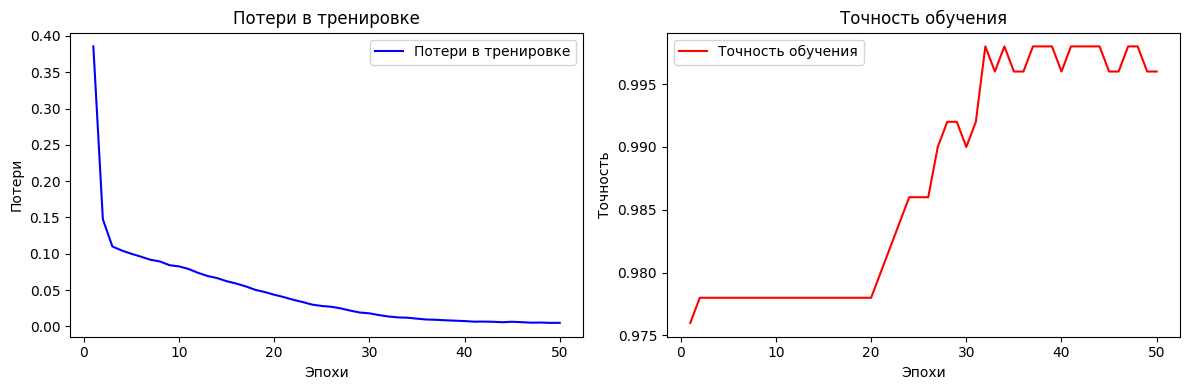

In [ ]:
# Вариант обучения на датасете.
# Предварительно выполнены: Загрузка и предобработка данных
# x_train - входные данные (табличные параметры из резюме)
# y_train - выходные данные (оценка пригодности)

# Создание модели
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(63,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train_02, y_train, epochs=50, batch_size=32)

# Оценка модели
loss, accuracy = model.evaluate(x_train_02, y_train)
print("Потери:", loss)
print("Точность:", accuracy)

# Отрисовка графика истории обучения
plot_training_history(history)


В этом примере последний слой имеет один нейрон и функцию активации сигмоид.

Модель компилируется с оптимизатором 'adam', функцией потерь 'binary_crossentropy' (так как у нас два класса: "да" и "нет") и метрикой точности (accuracy).

Модель обучается на данных x_train и y_train в течение 50 эпох с размером пакета 32. Обученная модель оценивается на тех же данных для вычисления значения потерь и точности.

##### Проверяю предсказания этой модели

In [ ]:
# Загружаю и готовлю данные для предсказаний
# Загрузка файла.xlsx
data_pr = pd.read_excel('ДатаСет_Оценка_резюме_581_резюме_3_0_метки_перемеш.xlsx')

In [ ]:
#Убираю лишние столбцы:
fixed_df_empty = data_pr.drop(data_pr.columns[0],axis = 1)                  # Убираем первый столбец с продублированными индексами. Он нам не нужен
fixed_df_empty = fixed_df_empty.drop(fixed_df_empty.columns[0],axis = 1)     # Убираем первый столбец с датой отклика. Он нам не нужен
#fixed_df_empty = fixed_df_empty.drop(fixed_df_empty.columns[0],axis = 1)    # Убираем первый столбец с ФИО. Он нам не нужен
# Вывод количества резюме и числа оставшихся признаков
print(fixed_df_empty.shape)

In [ ]:
# Убрать кодировку в описаниях \xa0 \n
i=0
for j in range(15):  # Для каждого из столбцов таблицы (их теперь 15)
    for i in range(fixed_df_empty.shape[0]): # По всем резюме
        if type(fixed_df_empty.values[i][j])!=float: # если данные текстовые, то заменяем фрагменты кодировки ASCII на отсутствие символов
            fixed_df_empty.values[i][j] = fixed_df_empty.values[i][j].replace("\xa0","")
            fixed_df_empty.values[i][j] = fixed_df_empty.values[i][j].replace("\n"," ") # здесь замена перевода строки на пробел

In [ ]:
# Настройка названий столбцов. Избавляет от зависимости использования номера по порядку в таблице

COL_SEX_AGE     = fixed_df.columns.get_loc('Пол, возраст')
COL_SALARY      = fixed_df.columns.get_loc('ЗП')
COL_POS_SEEK    = fixed_df.columns.get_loc('Ищет работу на должность')
COL_CITY        = fixed_df.columns.get_loc('Город')
COL_EMPL        = fixed_df.columns.get_loc('Занятость')
COL_SCHED       = fixed_df.columns.get_loc('График')
COL_EXP         = fixed_df.columns.get_loc('Опыт ()')
СOL_CUR_PL_WORK = fixed_df.columns.get_loc('Последнее/нынешное место работы')
COL_POS_PREV    = fixed_df.columns.get_loc('Последняя/нынешняя должность')
COL_EDU         = fixed_df.columns.get_loc('Образование и ВУЗ')
COL_UPDATED     = fixed_df.columns.get_loc('Обновление резюме')
СOL_RESULT      = fixed_df.columns.get_loc('Подходит - да/нет')
COL_SKILLS      = fixed_df.columns.get_loc('Ключевые навыки')
COL_TASKS       = fixed_df.columns.get_loc('Выполняемые задачи на прошлых местах работ')
COL_ABOUT       = fixed_df.columns.get_loc('Обо мне')

In [ ]:
# Формирование выборки из загруженного набора данных. Назову ее тестовой

# x_test, y_test = get01Data(fixed_df_empty.values) # В варианте использования функции 1
x_test, y_test = construct_train_data(fixed_df_empty.values)  # В варианте использования функции 2



In [ ]:
# Форма наборов параметров и результата
print('x_test.shape:',x_test.shape)
print('y_test.shape:',y_test.shape)

# Пример обработанных данных
n = 6
print('Пример результата векторизации данных в строке n (x_test[n]):', x_test[n])
print('Пример результата векторизации данных в строке n (y_test[n]):', y_test[n])

In [ ]:
# Проверка работы сети - предсказание на "тестовой" выборке
pred = model.predict(x_test)
pred

In [ ]:
# Для удобочитаемости:
predictions = pred.flatten()  # Преобразование в одномерный массив
predictions = [1 if p >= 0.5 else 0 for p in predictions]  # Преобразование вероятностей в метки "да" (1) или "нет" (0)

print(predictions)
sum(predictions)

В загруженном датасете метки были такие:
image.png


С меткам загруженного ДС не совпадает предсказаение по 10 строке резюме (вместо да предсказано нет)

##### Еще нейронка по простым табличным данным


In [ ]:
# Заново формирование выборки из загруженного набора данных
x_train_02, y_train = construct_train_data(fixed_df.values)

# Обучаем модель полученными данными
model = Sequential()
model.add(BatchNormalization(input_shape=(x_train_02.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1000, activation='tanh'))
model.add(Dense(400, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(lr=1e-5), loss='mse', metrics=['mae'])

history = model.fit(x_train_02,
                    y_train,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.15,
                    verbose=1)

plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

тут видно переобучение

In [ ]:
# Проверка работы сети - предсказание на "тестовой" выборке
pred = model.predict(x_test)
# Для удобочитаемости:
predictions = pred.flatten()  # Преобразование в одномерный массив
predictions = [1 if p >= 0.5 else 0 for p in predictions]  # Преобразование вероятностей в метки "да" (1) или "нет" (0)
print(pred)
print(predictions)

In [ ]:
# Делаем предсказание и приводим его к начальному виду
pred = model.predict(x_train_02)
pred = pred.flatten()
# Среднее значение ошибки
delta = pred - y_train
absDelta = abs(delta)
print(sum(absDelta) / len(absDelta))

Результаты предсказаний хуже, чем в первом варианте.
Активационной функцией на выходном слое все же лучше sigmoid

 #### Модель для текстовых данных о текущей работе

Подготовленная и протестированная ранее модель для обработки данных по текущей работе соискателя удалена из данного ноутбука. т.к работала с другой размерностью входных данных, не требоваших нормализации на входе.  Нижеприведенная модель адаптирована под изменения предобработанных данных по текущей работе соискателя.

Epoch 1/100
4/4 [==============================] - 1s 68ms/step - loss: 0.7673 - accuracy: 0.5375 - val_loss: 0.6473 - val_accuracy: 0.9700
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.3774 - accuracy: 0.8800 - val_loss: 0.6115 - val_accuracy: 0.9700
Epoch 3/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2255 - accuracy: 0.9525 - val_loss: 0.5817 - val_accuracy: 0.9700
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 0.1627 - accuracy: 0.9725 - val_loss: 0.5559 - val_accuracy: 0.9700
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1228 - accuracy: 0.9775 - val_loss: 0.5329 - val_accuracy: 0.9700
Epoch 6/100
4/4 [==============================] - 0s 20ms/step - loss: 0.1143 - accuracy: 0.9750 - val_loss: 0.5139 - val_accuracy: 0.9700
Epoch 7/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0962 - accuracy: 0.9900 - val_loss: 0.4969 - val_accuracy: 0.9700
Epoch 8/100
4/4 [===

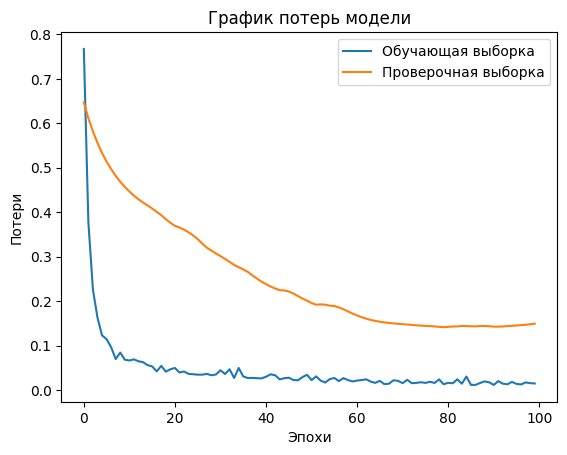

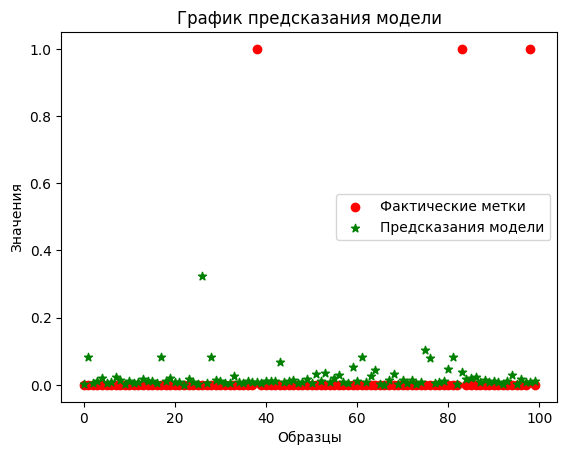

In [ ]:
# Модель для обучения тексту об месте работы и должности
x_train_02, y_train = construct_train_data(fixed_df.values)

# Разделение на обучающую и проверочную выборки
x_train_txt_prof, x_val_txt_prof, y_train, y_val = train_test_split(xTrainTProfVectors, y_train, test_size=0.2, random_state=42)

# Создание модели
model = Sequential()

# Слой нормализации данных
model.add(BatchNormalization(input_shape=(300,)))

# Полносвязный слой с 128 нейронами и функцией активации ReLU
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.4))

# Выходной слой с 1 нейроном и функцией активации sigmoid для предсказания вероятности
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train_txt_prof, y_train, validation_data=(x_val_txt_prof, y_val), epochs=100, batch_size=128)


# Получение предсказаний модели на проверочной выборке
y_pred = model.predict(x_val_txt_prof)

# Построение графика потерь
plt.plot(history.history['loss'], label='Обучающая выборка')
plt.plot(history.history['val_loss'], label='Проверочная выборка')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.title('График потерь модели')
plt.legend()
plt.show()

# Построение графика предсказания
plt.scatter(range(len(y_val)), y_val, c='red', marker='o', label='Фактические метки')
plt.scatter(range(len(y_val)), y_pred, c='green', marker='*', label='Предсказания модели')
plt.xlabel('Образцы')
plt.ylabel('Значения')
plt.title('График предсказания модели')
plt.legend()
plt.show()


#### Модель для текстовых данных об образовании

Epoch 1/80
13/13 [==============================] - 1s 20ms/step - loss: 0.0199 - mae: 0.0381 - val_loss: 0.0306 - val_mae: 0.0454
Epoch 2/80
13/13 [==============================] - 0s 8ms/step - loss: 0.0187 - mae: 0.0410 - val_loss: 0.0313 - val_mae: 0.0576
Epoch 3/80
13/13 [==============================] - 0s 8ms/step - loss: 0.0173 - mae: 0.0438 - val_loss: 0.0313 - val_mae: 0.0691
Epoch 4/80
13/13 [==============================] - 0s 9ms/step - loss: 0.0148 - mae: 0.0379 - val_loss: 0.0316 - val_mae: 0.0787
Epoch 5/80
13/13 [==============================] - 0s 8ms/step - loss: 0.0128 - mae: 0.0429 - val_loss: 0.0332 - val_mae: 0.0733
Epoch 6/80
13/13 [==============================] - 0s 8ms/step - loss: 0.0096 - mae: 0.0377 - val_loss: 0.0340 - val_mae: 0.0815
Epoch 7/80
13/13 [==============================] - 0s 9ms/step - loss: 0.0082 - mae: 0.0369 - val_loss: 0.0365 - val_mae: 0.0890
Epoch 8/80
13/13 [==============================] - 0s 9ms/step - loss: 0.0067 - mae: 0.0

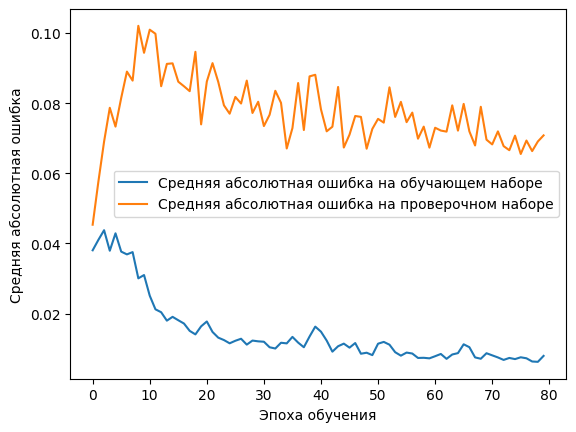

In [ ]:
# Предсказываем пригодность по данным об образовании
x_train_02, y_train = construct_train_data(fixed_df.values)
# здесь в параметрах maxWordCount = 5000
modelTRez = Sequential()
modelTRez.add(Dense(20, activation='relu',input_dim=(xTrainEduc01.shape[1])))
modelTRez.add(Dense(500, activation='relu'))
modelTRez.add(Dropout(0.3))                             # этим слоем модель отличается от предыдущей
modelTRez.add(Dense(1, activation='linear'))

modelTRez.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

history = modelTRez.fit(xTrainEduc01[:400],
                    y_train[:400],
                    batch_size=32,
                    epochs=80,
                    validation_data=(xTrainEduc01[400:], y_train[400:]),
                    verbose=1, shuffle=True)

plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

Вывод: На несбалансированном датасете не получается добиться результатов

На малом количестве данных сбалансированного датасета - переобучение

### Составные  НС

Пробую собрать связку из 4 НС:
 - НС для работы с табличными данными по соискателю (вход 1)
 - НС для работы с текстом об текущем месте работы (вход 2)
 - НС для работы с текстом об образовании (вход 3)
 - НС для работы с текстом о ключевых навыках + задачи (вход 4)



---



In [ ]:
# Заново формирование выборки из загруженного набора данных
x_train_02, y_train = construct_train_data(fixed_df.values)
xTrainTProfVectors, y_train  ## это выходной вектор после предобработки данных об текущем месте работы. Надо нормализовать на входе в НС
xTrainEduc01 = tokenizer.sequences_to_matrix(xTrainEducIndexes)
xTrainTSkillsVectors, y_train ## это выходной вектор после предобработки данных о навыках соискателя. Надо нормализовать на входе в НС

# Построение составной модели. Вариант 1 (модель из практического ноутбука курса)

input1 = Input((x_train_02.shape[1],))  # обучающая выборка по табличным данным в варианте сборки вектора № 2
input2 = Input(shape=(300,), name='xTrainTProfVectors')  # обучающая выборка по текстовым данным об текущем месте работы
input3 = Input((xTrainEduc01.shape[1],))  # обучающая выборка по текстовым данным об образовании
input4 = Input(shape=(300,), name='xTrainTSkillsVectors')  # обучающая выборка по текстовым данным об ключевых навыках

x1 = BatchNormalization()(input1)  # Создаем ветку х1
x1 = Dropout(0.5)(x1)
x1 = Dense(10, activation="relu")(x1)
x1 = Dense(1000, activation="relu")(x1)
x1 = Dense(100, activation="relu")(x1)

x2 = BatchNormalization()(input2)  # Создаем ветку х2
x2 = Dense(25, activation="relu")(x2)
x2 = Dense(8, activation="tanh")(x2)
x2 = Dense(5, activation="elu")(x2)

x3 = BatchNormalization()(input3)  # Создаем ветку х3
x3 = Dense(1000, activation="tanh")(x3)
x3 = Dense(20, activation="elu")(x3)
x3 = Dense(5, activation="elu")(x3)

x4 = BatchNormalization()(input4)  # Создаем ветку х4
x4 = Dense(25, activation="relu")(x4)
x4 = Dense(8, activation="tanh")(x4)
x4 = Dense(5, activation="elu")(x4)

x = concatenate([x1, x2, x3, x4])  # Объединяем все три ветки

x = Dense(15, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='linear')(x)  # Финальный нейрон, делает регрессию

model = Model(inputs=[input1, input2, input3, input4], outputs=x)  # В Model загружаем стартовые и последнюю точки

model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

history = model.fit(
    [x_train_02[:425], xTrainTProfVectors[:425], xTrainEduc01[:425], xTrainTSkillsVectors[:425]],  # первые 425/17 строк ДС
    y_train[:425],
    epochs=80,
    validation_data=(
        [x_train_02[425:], xTrainTProfVectors[425:], xTrainEduc01[425:], xTrainTSkillsVectors[425:] ],  # последние 75/6 строк
        y_train[425:]
    ),
    verbose=1,
    shuffle=True
)


Epoch 1/80
14/14 [==============================] - 4s 71ms/step - loss: 0.0845 - mae: 0.1825 - val_loss: 0.0414 - val_mae: 0.0661
Epoch 2/80
14/14 [==============================] - 1s 51ms/step - loss: 0.0289 - mae: 0.0555 - val_loss: 0.0416 - val_mae: 0.0516
Epoch 3/80
14/14 [==============================] - 1s 51ms/step - loss: 0.0190 - mae: 0.0339 - val_loss: 0.0397 - val_mae: 0.0574
Epoch 4/80
14/14 [==============================] - 1s 57ms/step - loss: 0.0173 - mae: 0.0330 - val_loss: 0.0393 - val_mae: 0.0588
Epoch 5/80
14/14 [==============================] - 1s 50ms/step - loss: 0.0185 - mae: 0.0324 - val_loss: 0.0392 - val_mae: 0.0506
Epoch 6/80
14/14 [==============================] - 1s 57ms/step - loss: 0.0174 - mae: 0.0324 - val_loss: 0.0392 - val_mae: 0.0506
Epoch 7/80
14/14 [==============================] - 1s 55ms/step - loss: 0.0187 - mae: 0.0365 - val_loss: 0.0391 - val_mae: 0.0530
Epoch 8/80
14/14 [==============================] - 1s 51ms/step - loss: 0.0163 - m

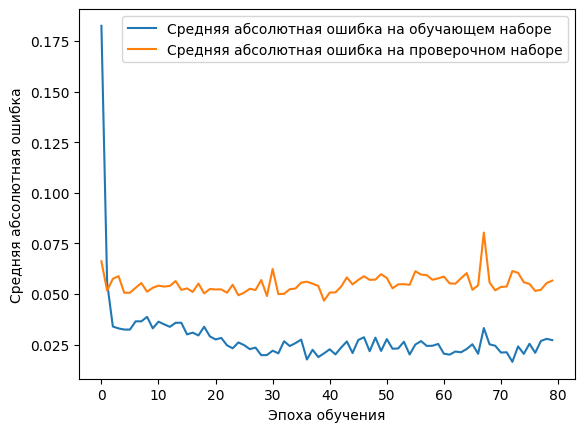

In [ ]:
plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
# Доработанный код составной модели (Вариант 2: балансировка+колбэки+подобранные НС):

from imblearn.over_sampling import RandomOverSampler

# Заново формирование выборки из загруженного набора данных
x_train_02, y_train = construct_train_data(fixed_df.values)
xTrainEduc01 = tokenizer.sequences_to_matrix(xTrainEducIndexes)
#  xTrainTProfVectors
#  xTrainTSkillsVectors
#  xTrainTSkillsTasksVectors
#  xTrainTSkillsTasksAboutVectors

# Применение oversampling для балансировки выборки
oversampler = RandomOverSampler(random_state=42)

x_resampled_tab_02, y_resampled_tab_02 = oversampler.fit_resample(x_train_02, y_train)
x_resampled_txt_Prof, y_resampled_txt_Prof = oversampler.fit_resample(xTrainTProfVectors, y_train)
x_resampled_txt_Educ, y_resampled_txt_Educ = oversampler.fit_resample(xTrainEduc01, y_train)
# x_resampled_txt_Skills, y_resampled_txt_Skills = oversampler.fit_resample(xTrainTSkillsVectors, y_train)
# x_resampled_txt_SkillsTasks, y_resampled_txt_SkillsTasks = oversampler.fit_resample(xTrainTSkillsTasksVectors, y_train)
x_resampled_txt_SkillsTasksAbout, y_resampled_txt_SkillsTasksAbout = oversampler.fit_resample(xTrainTSkillsTasksAboutVectors, y_train)

In [ ]:
# Чтобы убедиться, что размерности данных и целевых значений совпадают, и они готовы для использования в обучении модели:

print(x_resampled_tab_02.shape)  # Размерность данных x_resampled_tab_02
print(y_resampled_tab_02.shape)  # Размерность целевых значений y_resampled_tab_02

print(x_resampled_txt_Prof.shape)  # Размерность данных x_resampled_txt_Prof
print(y_resampled_txt_Prof.shape)  # Размерность целевых значений y_resampled_txt_Prof

print(x_resampled_txt_Educ.shape)  # Размерность данных x_resampled_txt_Educ
print(y_resampled_txt_Educ.shape)  # Размерность целевых значений y_resampled_txt_Educ

print(x_resampled_txt_SkillsTasksAbout.shape)  # Размерность данных x_
print(y_resampled_txt_SkillsTasksAbout.shape)  # Размерность целевых значений y_

(978, 63)
(978,)
(978, 300)
(978,)
(978, 5000)
(978,)
(978, 300)
(978,)


In [ ]:
# теперь составная модель:

# Создание входных слоев
input1 = Input((x_resampled_tab_02.shape[1],))    # обучающая выборка по табличным данным в варианте сборки вектора № 2
input2 = Input(shape=(300,), name='x_resampled_txt_Prof')  # обучающая выборка по текстовым данным об текущем месте работы
input3 = Input((x_resampled_txt_Educ.shape[1],))  # обучающая выборка по текстовым данным об обркзовании
input4 = Input(shape=(300,), name='x_resampled_txt_SkillsTasksAbout')  # обучающая выборка по текстовым данным о ключевых навыках, задачах и о себе

# Ветка х1 (изменена на НС для обработки табличных данных)
x1 = BatchNormalization()(input1)
x1 = Dense(128, activation="relu")(x1)
x1 = Dense(1000, activation="tanh")(x1)
x1 = Dense(100, activation="relu")(x1)
# x1 = Dense(1, activation="linear")(x1)           # ???? надо ли включать выходной слой каждой модели в ветке? Или у них общий выходной слой?  Тогда какой?

# Ветка х2 (изменена на НС для обучения на текстовых данных по текущей работе)
x2 = BatchNormalization()(input2)
x2 = Dense(64, activation="relu")(x2)
# x2 = Dense(1, activation="sigmoid")(x2)          # ???? надо ли включать выходной слой каждой модели в ветке? Или у них общий выходной слой?  Тогда какой?


# Ветка х3 (изменена на НС для обучения на текстовых данных по образованию)
x3 = BatchNormalization()(input3)
x3 = Dense(20, activation="relu")(x3)
x3 = Dense(500, activation="relu")(x3)
x3 = Dropout(0.3) (x3)
#x3 = Dense(1, activation="linear")(x3)          # ???? надо ли включать выходной слой каждой модели в ветке? Или у них общий выходной слой?  Тогда какой?

# Ветка х4 (изменена на НС для обучения на текстовых данных по ключевым навыкам)
x4 = BatchNormalization()(input4)
x4 = Dense(64, activation="relu")(x4)
# x4 = Dense(1, activation="sigmoid")(x4)          # ???? надо ли включать выходной слой каждой модели в ветке? Или у них общий выходной слой?  Тогда какой?

# Объединение всех четырех веток
x = concatenate([x1, x2, x3, x4])

x = Dense(15, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='linear')(x)           # Финальный нейрон, делает регрессию

# Создание модели
model = Model(inputs=[input1, input2, input3, input4], outputs=x)
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

# Определение колбэков:
# EarlyStopping с параметром patience=10 и монитором val_loss. Этот колбэк останавливает обучение, если
# значение функции потерь на проверочной выборке не улучшается в течение 10 эпох:
early_stopping = EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)
# ModelCheckpoint с параметром save_best_only=True и монитором val_loss. Этот колбэк сохраняет только
# лучшую модель на основе значения функции потерь на проверочной выборке:
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
# ReduceLROnPlateau с параметрами factor=0.1, patience=5 и монитором val_loss. Этот колбэк  уменьшает скорость
# обучения на 10% в случае, если значение функции потерь на проверочной выборке не улучшается в течение 5 эпох:
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, monitor='val_loss')
# Обучение модели с использованием колбэков

# !!! При передаче целевых значений в функцию model.fit, необходимо объединить их в список, так как функция model.fit ожидает
# один список для целевых значений:

history = model.fit(
    [x_resampled_tab_02[:782], x_resampled_txt_Prof[:782], x_resampled_txt_Educ[:782], x_resampled_txt_SkillsTasksAbout[:782]],  # первые 782/425/17 строк ДС после oversampling
    [y_resampled_tab_02[:782], y_resampled_txt_Prof[:782], y_resampled_txt_Educ[:782], y_resampled_txt_SkillsTasksAbout[:782]],  # Используем сбалансированные целевые значения
    epochs=80,
    validation_data=(
        [x_resampled_tab_02[782:], x_resampled_txt_Prof[782:], x_resampled_txt_Educ[782:], x_resampled_txt_SkillsTasksAbout[782:]],  # последние х/75/6 строк после oversampling
        [y_resampled_tab_02[782:], y_resampled_txt_Prof[782:], y_resampled_txt_Educ[782:], y_resampled_txt_SkillsTasksAbout[782:]]  # Используем сбалансированные целевые значения
    ),
    verbose=1,
    shuffle=True,
  # callbacks=[early_stopping, model_checkpoint, reduce_lr]   # включены все 3 колбэка
  callbacks=[model_checkpoint, reduce_lr]                     # вЫключен EarlyStopping
)

Epoch 1/80
25/25 [==============================] - 5s 54ms/step - loss: 0.2182 - mae: 0.3329 - val_loss: 0.7429 - val_mae: 0.8602 - lr: 0.0010
Epoch 2/80
25/25 [==============================] - 1s 33ms/step - loss: 0.1287 - mae: 0.2139 - val_loss: 0.6157 - val_mae: 0.7837 - lr: 0.0010
Epoch 3/80
25/25 [==============================] - 1s 34ms/step - loss: 0.1197 - mae: 0.2062 - val_loss: 0.5427 - val_mae: 0.7339 - lr: 0.0010
Epoch 4/80
25/25 [==============================] - 1s 31ms/step - loss: 0.1057 - mae: 0.2001 - val_loss: 0.5166 - val_mae: 0.7168 - lr: 0.0010
Epoch 5/80
25/25 [==============================] - 1s 21ms/step - loss: 0.1074 - mae: 0.2066 - val_loss: 0.4837 - val_mae: 0.6938 - lr: 0.0010
Epoch 6/80
25/25 [==============================] - 1s 20ms/step - loss: 0.0924 - mae: 0.1987 - val_loss: 0.4754 - val_mae: 0.6872 - lr: 0.0010
Epoch 7/80
25/25 [==============================] - 1s 22ms/step - loss: 0.0906 - mae: 0.2019 - val_loss: 0.4433 - val_mae: 0.6632 - lr:

Комментарий к коду выше:

Здесь добавлено сэмплирование данных с использованием метода RandomOverSampler, чтобы сбалансировать датасет. Цель - учить модель на примерно равном количестве примеров положительного и отрицательного классов.

При переработке исходного кода для составной модели выполнены следующие шаги:

Импорт класса RandomOverSampler из модуля imblearn.over_sampling (добавлен и в сборник библиотек).

Применение oversampling к обучающей выборке, вызывая fit_resample у RandomOverSampler. Цель - сбалансированный набор данных, в котором положительные и отрицательные примеры будут иметь примерно одинаковое количество.

Используем сбалансированный набор данных X_resampled и y_resampled вместо исходных x_train и y_train в вызове model.fit.

При определении входных слоев и их веток выполнены преобразования в соответствии с подобранными моделями (относительно исходной составной модели, взятой с практического ноутбука курса)

Т.о, этот код учитывает несбалансированность данных путем применения oversampling и использования сбалансированного набора данных для обучения модели с подобранными НС для данного ДС



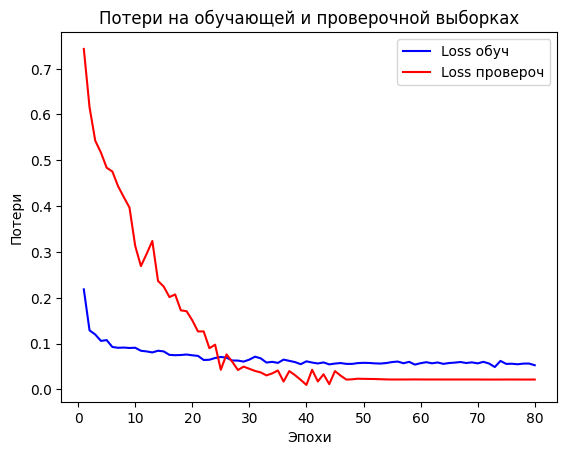

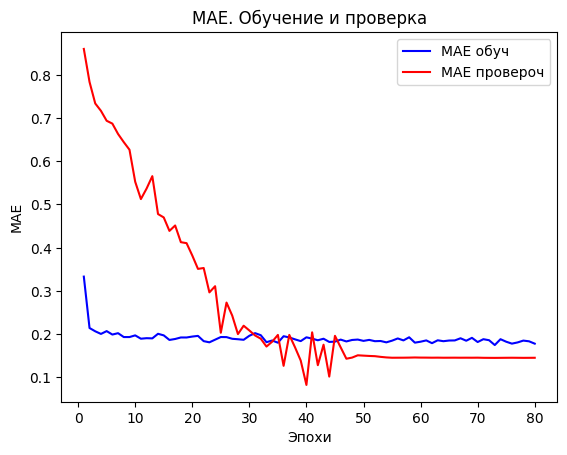

In [ ]:
# Визуализация обучения:

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']

epochs = range(1, len(loss_values) + 1)

# График функции потерь
plt.figure()
plt.plot(epochs, loss_values, 'b', label= 'Loss обуч')
plt.plot(epochs, val_loss_values, 'r', label='Loss провероч')
plt.title('Потери на обучающей и проверочной выборках')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

# График метрики MAE
plt.figure()
plt.plot(epochs, mae_values, 'b', label='MAE обуч')
plt.plot(epochs, val_mae_values, 'r', label='MAE провероч')
plt.title('MAE. Обучение и проверка')
plt.xlabel('Эпохи')
plt.ylabel('MAE')
plt.legend()
plt.show()



ВЫВОДЫ по обучаемости модели:

1. Вполне себе обучается.

2. Колбек EarlyStopping с параметром patience=10 и монитором val_loss не уже прерывает обучение. С включенным колбэком достигаем заданной 80 эпохи.


In [ ]:
# Оценка модели на проверочной выборке
val_loss, val_mae = model.evaluate(
    [x_resampled_tab_02[782:], x_resampled_txt_Prof[782:], x_resampled_txt_Educ[782:], x_resampled_txt_SkillsTasksAbout[782:]],
    [y_resampled_tab_02[782:], y_resampled_txt_Prof[782:], y_resampled_txt_Educ[782:], y_resampled_txt_SkillsTasksAbout[782:]]
)
print("Loss на проверочных данных:", val_loss)
print("MAE на проверочных данных:", val_mae)


7/7 [==============================] - 0s 5ms/step - loss: 0.0214 - mae: 0.1449
Loss на проверочных данных: 0.021395312622189522
MAE на проверочных данных: 0.1448763608932495


## Выполнение предсказаний на тестовых данных

Для выполнения предсказаний на тестовых данных, необходимо:

1. Подвергнуть тестовый датасет такой же обработе, которую применяли для обучения НС: Извлечь данные, причесать, оцифровать и сформировать выборку для подачи в обученную ранее НС

2. Скормить данные ранее обученной НС, которая выполнит предсказание.  Результат записать в дополнительное (новое) поле исходного дататсета.

3. Экспортировать обогощенный новым полем дататсет в новый файл, с новым полем для передачи Заказчику.

In [ ]:
# Загрузка и подготовка данных тестового датасета для предсказаний обученной НС
# Предполагается, что тестовые данные составят файл test_dataset c такой же структурой данных, как и исходный.
# Загрузим как файл .xlsx
test_dataset = pd.read_excel('test_dataset_2.xlsx') # здесь только размеченные Заказчиком резюме, перемешанные случайным образом.

#Убрать лишние столбцы
test_dataset = test_dataset.drop(data.columns[0],axis = 1)              # Убираем первый столбец с продублированными индексами. Он нам не нужен
test_dataset = test_dataset.drop(test_dataset.columns[0],axis = 1)      # Убираем первый столбец с датой отклика. Он нам не нужен
# test_dataset = test_dataset.drop(test_dataset.columns[0],axis = 1)    # Убираем первый столбец с ФИО. Он нам не нужен

# Убрать кодировку в описаниях \xa0 \n
i=0
for j in range(15):  # Для каждого из столбцов таблицы (их теперь 15)
    for i in range(test_dataset.shape[0]): # По всем резюме
        if type(test_dataset.values[i][j])!=float: # если данные текстовые, то заменяем фрагменты кодировки ASCII на отсутствие символов
            test_dataset.values[i][j] = test_dataset.values[i][j].replace("\xa0","")
            test_dataset.values[i][j] = test_dataset.values[i][j].replace("\n"," ") # здесь замена перевода строки на пробел

# Настройка названий столбцов.
COL_SEX_AGE     = test_dataset.columns.get_loc('Пол, возраст')
COL_SALARY      = test_dataset.columns.get_loc('ЗП')
COL_POS_SEEK    = test_dataset.columns.get_loc('Ищет работу на должность')
COL_CITY        = test_dataset.columns.get_loc('Город')
COL_EMPL        = test_dataset.columns.get_loc('Занятость')
COL_SCHED       = test_dataset.columns.get_loc('График')
COL_EXP         = test_dataset.columns.get_loc('Опыт ()')
СOL_CUR_PL_WORK = test_dataset.columns.get_loc('Последнее/нынешное место работы')
COL_POS_PREV    = test_dataset.columns.get_loc('Последняя/нынешняя должность')
COL_EDU         = test_dataset.columns.get_loc('Образование и ВУЗ')
COL_UPDATED     = test_dataset.columns.get_loc('Обновление резюме')
СOL_RESULT      = test_dataset.columns.get_loc('Подходит - да/нет')
COL_SKILLS      = test_dataset.columns.get_loc('Ключевые навыки')
COL_TASKS       = test_dataset.columns.get_loc('Выполняемые задачи на прошлых местах работ')
COL_ABOUT       = test_dataset.columns.get_loc('Обо мне')

# Вытаскиваю из дататсета текстовые данные по должности и месту работы для выборки
xTestProf = getXTrainTProf(test_dataset.values)

# Преобразование текста о работе в вектор, представляющий собой числовое представление текста, созданное с использованием алгоритма word2vec. Заданная размерность 300
xTestProfVectors = [text_to_vector(text) for text in xTestProf]
xTestProfVectors = np.array(xTestProfVectors)

## Вытаскиваю из дататсета текстовые данные по ключевым навыкам
#xTestSkills = getXTrainTSkills(test_dataset.values)

###### Вытаскиваю из дататсета текстовые данные по ключевым навыкам и задачам
###### xTestSkillsTasks = getXTrainTSkillsTasks(test_dataset.values)

## Преобразование текста о навыках в вектор, представляющий собой числовое представление текста, созданное с использованием алгоритма word2vec. Заданная размерность 300
#xTestSkillsVectors = [text_to_vector(text) for text in xTestSkills]
#xTestSkillsVectors = np.array(xTestSkillsVectors)

# Преобразование текста о навыках и задачах в вектор, представляющий собой числовое представление текста, созданное с использованием алгоритма word2vec. Заданная размерность 300
xTestSkillsTasksAbout = test_dataset.apply(lambda row: preprocess_skills_tasks_about(row), axis=1)
xTestSkillsTasksAboutVectors = [text_to_vector(text) for text in xTestSkillsTasksAbout]
xTestSkillsTasksAboutVectors = np.array(xTestSkillsTasksAboutVectors)

# Вытаскиваю из дататсета текстовые данные по образованию для выборки
xTestEduc = getXTrainTEduc(test_dataset.values)

# Преобразование текста в последовательность индексов, согласно частотному словарю созданному при обучении (!!!)
xTestEducIndexes = tokenizer.texts_to_sequences(xTestEduc)            # преобразование текстов в индексы

# Формирование выборки из загруженного набора простых табличных данных
x_test_02, y_test = construct_train_data(test_dataset.values)

# С вектором текста о работе ничего не делаю.
# С вектором текста о навыках ничего не делаю.

# Преобразование полученной текстовой выборки по образованию из последовательности индексов в матрицы нулей и единиц по принципу Bag of Words:
xTestEduc01 = tokenizer.sequences_to_matrix(xTestEducIndexes)

In [ ]:
# Проверка размерности всех данных на вход для предсказаний
print(x_test_02.shape)
print(xTestProfVectors.shape)
print(xTestEduc01.shape)
#print(xTestSkillsVectors.shape)
print(xTestSkillsTasksAboutVectors.shape)
print(y_test.shape)


(23, 63)
(23, 300)
(23, 5000)
(23, 300)
(23,)



Для добавления колонки "оценка резюме" с процентным распределением вероятностей между классами "подходит" и "не подходит" в тестовый датасет, можно воспользоваться следующим кодом:

In [ ]:
# Получение предсказаний модели на тестовых данных.

#predictions = model.predict([x_test_02, xTestProfVectors, xTestEduc01, xTestSkillsVectors])  # используется та модель, которая которой присвоено имя "model" последней
predictions = model.predict([x_test_02, xTestProfVectors, xTestEduc01, xTestSkillsTasksAboutVectors])  # используется та модель, которая которой присвоено имя "model" последней

# Вычисление процентного распределения вероятностей
percentage = predictions * 100

# Формирование колонки "оценка резюме" в формате "подходит % / не подходит %"
evaluation = []
for p in percentage:
  if p >= 50:
    evaluation.append(f"подходит {p[0]:.2f}%")   #Форматирование f-строки поддерживается для обычных числовых типов данных, но не для массивов NumPy.
# Для избежания ошибки в выполении кода  нужно применить форматирование f-строки к каждому элементу массива p в цикле.
# Здесь мы используем p[0], чтобы получить значение из массива p, так как p является массивом с единственным элементом.
  else:
    evaluation.append(f"НЕ подходит {100 - p[0]:.2f}%")

# Добавление колонки "оценка резюме" в тестовый датасет
test_dataset['оценка резюме НС'] = evaluation

# Экспорт тестового датасета в CSV-файл
test_dataset.to_csv('test_dataset_with_evaluation.csv', index=True) #  Параметр index=False указывает, что индексы строк не должны быть
# включены в выходной CSV-файл.


1/1 [==============================] - 0s 245ms/step


Этим кодом мы сначала получаем предсказания модели на тестовых данных. Затем вычисляем процентное распределение вероятностей, умножая предсказания на 100. Далее, формируем колонку "оценка резюме" в формате "подходит % / не подходит %" для каждого предсказания. Затем, добавляем эту колонку в тестовый датасет.

**Внимание!**  Предполагаем, что от Заказчика получен тестовый датасет - файл с названием "test_datase" форматом  = исходному, **включая колонку с метками (возможно - пустую)** и который мы дополняем  новой колонкой "оценка резюме НС".

1/1 [==============================] - 0s 27ms/step


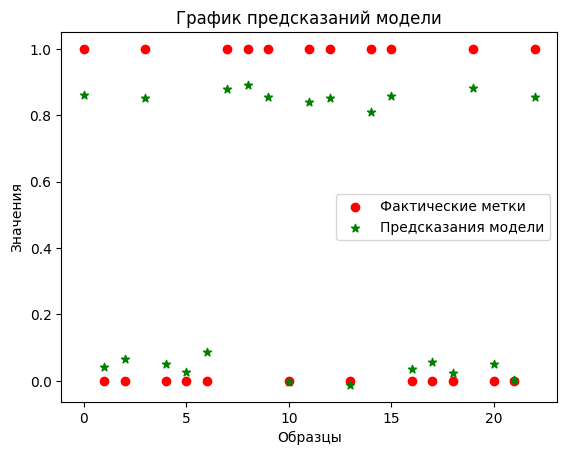

In [ ]:
# Визуализация предсказаний относительно меток

import matplotlib.pyplot as plt

# Предсказанные значения модели
#y_pred = model.predict([x_test_02, xTestProfVectors, xTestEduc01,xTestSkillsVectors])
y_pred = model.predict([x_test_02, xTestProfVectors, xTestEduc01,xTestSkillsTasksAboutVectors])

# Построение графика
plt.scatter(range(len(y_test)), y_test, c='red', marker='o', label='Фактические метки')
plt.scatter(range(len(y_test)), y_pred, c='green', marker='*', label='Предсказания модели')

plt.xlabel('Образцы')
plt.ylabel('Значения')
plt.title('График предсказаний модели')
plt.legend()
plt.show()


In [ ]:
# посмотрим, как выглядит результат
test_dataset.head(23)

,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Выполняемые задачи на прошлых местах работ,Обо мне,Ключевые навыки,Образование и ВУЗ,Обновление резюме,Подходит - да/нет,оценка резюме НС
0,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,Маркетинговые исследования Исследование рынка;...,NaN,Анализ рынка Управление проектами Product Mana...,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",23 февраля 2023 в 16:30,да,подходит 86.02%
1,"Мужчина, 36 лет, родился 22 октября 1986",не указана,Product Manager в команду Финансового департам...,"Уфа, Не готов к переезду, готов к командировкам",полная занятость,полный день,Опыт работы —13 лет 7 месяцев,"ООО ""Уральская мясная компания""",Ведущий бизнес аналитик,- Внедрение системы 1С ERP. - Управленческий а...,Дополнительные тренинги: 2008 - компьютерные к...,Бюджетирование Формирование бюджета Управление...,"Высшее, 2009, Стерлитамакская государственная ...",19 января 2023 в 17:09,нет,НЕ подходит 95.69%
2,"Мужчина, 28 лет, родился 18 октября 1994",70 000 руб.,Product Manager в команду Финансового департам...,"Уфа, Готов к переезду, готов к командировкам",полная занятость,полный день,Опыт работы —5 лет 1 месяц,Ростелеком,Супервайзер отдела продаж,"Подключение интернета, заведение заявок, обуче...","Стрессоустойчивый, энергичный, нацелен на резу...",Настройка ПК Управление персоналом Активные пр...,"Высшее, 2016, Башкирский государственный аграр...",31 января 2023 в 09:52,нет,НЕ подходит 93.42%
3,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,Участие в команде роста В2В Задачи: - Развити...,NaN,Самомотивация Таймменеджмент Креативность Чувс...,"Высшее, 2022, GeekBrains, 2010, Московский худ...",8 февраля 2023 в 09:15,да,подходит 85.33%
4,"Женщина, 41 год, родилась 2 декабря 1981",не указана,Product Manager в команду Финансового департам...,"Уфа, Готова к переезду: Москва, Россия, Астрах...",полная занятость,полный день,Опыт работы —17 лет 6 месяцев,"ООО ""НТЦ ""Энергоавтоматизация """,Руководитель планово-экономического отдела,Организация и контроль работы финансовых менед...,NaN,Бюджетирование Финансовый анализ Финансовый ко...,"Высшее, 2008, Уфимский филиал Всероссийского з...",9 февраля 2023 в 06:53,нет,НЕ подходит 94.77%
5,"Женщина, 43 года, родилась 15 марта 1979",70 000 руб.,Product Manager в команду Финансового департам...,"Уфа, Готова к переезду: Москва, Екатеринбург, ...",полная занятость,полный день,Опыт работы —23 года 8 месяцев,"ГУСП МТС ""Центральная"" РБ",Начальник отдела казначейства,"- определение задач сотрудников, контроль испо...",Специалист в сфере финансов с общим стажем по ...,Бюджетирование Финансовый контроль Управленчес...,"Высшее, 2001, Московский институт коммерции и ...",8 февраля 2023 в 06:02,нет,НЕ подходит 97.29%
6,"Женщина, 49 лет, родилась 26 октября 1973",не указана,Product Manager в команду Финансового департам...,"Уфа, Не готова к переезду, готова к редким ком...",полная занятость,полный день,Опыт работы —23 года 8 месяцев,ИП Рахметов Э.Э.,Главный бухгалтер,"Полное ведение бухгалтерского , налогового и к...","Коммуникабельная, активная жизненная позиция, ...",NaN,"Высшее, 1996, Уфимский государственный нефтяно...",19 декабря 2022 в 09:34,нет,НЕ подходит 91.30%
7,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,,Запуск бренда и производства игристого кваса D...,"Чем бы я н

Сравнение результатов прошлых предсказаний с новыми:
- желтый фон предсказания модели без учета новых текстовых полей

- зеленый фон - предсказания модели с добавленной веткой обработки текста "навыки". Сравнение относительно желтого

- красный фон - предсказания модели с добавленной веткой обработки текста "навыки"+ "задачи" как есть (без предобработки). Сравнение относительно желтого
- красный фон - предсказания модели с добавленной веткой обработки текста "навыки"+ "задачи" но с предварительной предобработкой текста. Сравнение относительно желтого
- синий фон  - предсказания модели с обработкой предобработанного объединенного текста "навыки"+"задачи"+"обо мне" отдельной веткой составной НС.

Вывод: Добавленные текстовые поля повышают информативность о соискателе и в целом приблежают результаты предсказаний к классам "подходит"/"не подходит".
Но влияние текста поля "Обо мне" негативно в объединении с текстом "навыки" и "задачи". Необходимо обрабатывать отдельно и желательно отдельной веткой проверить влияние этой категории данных.

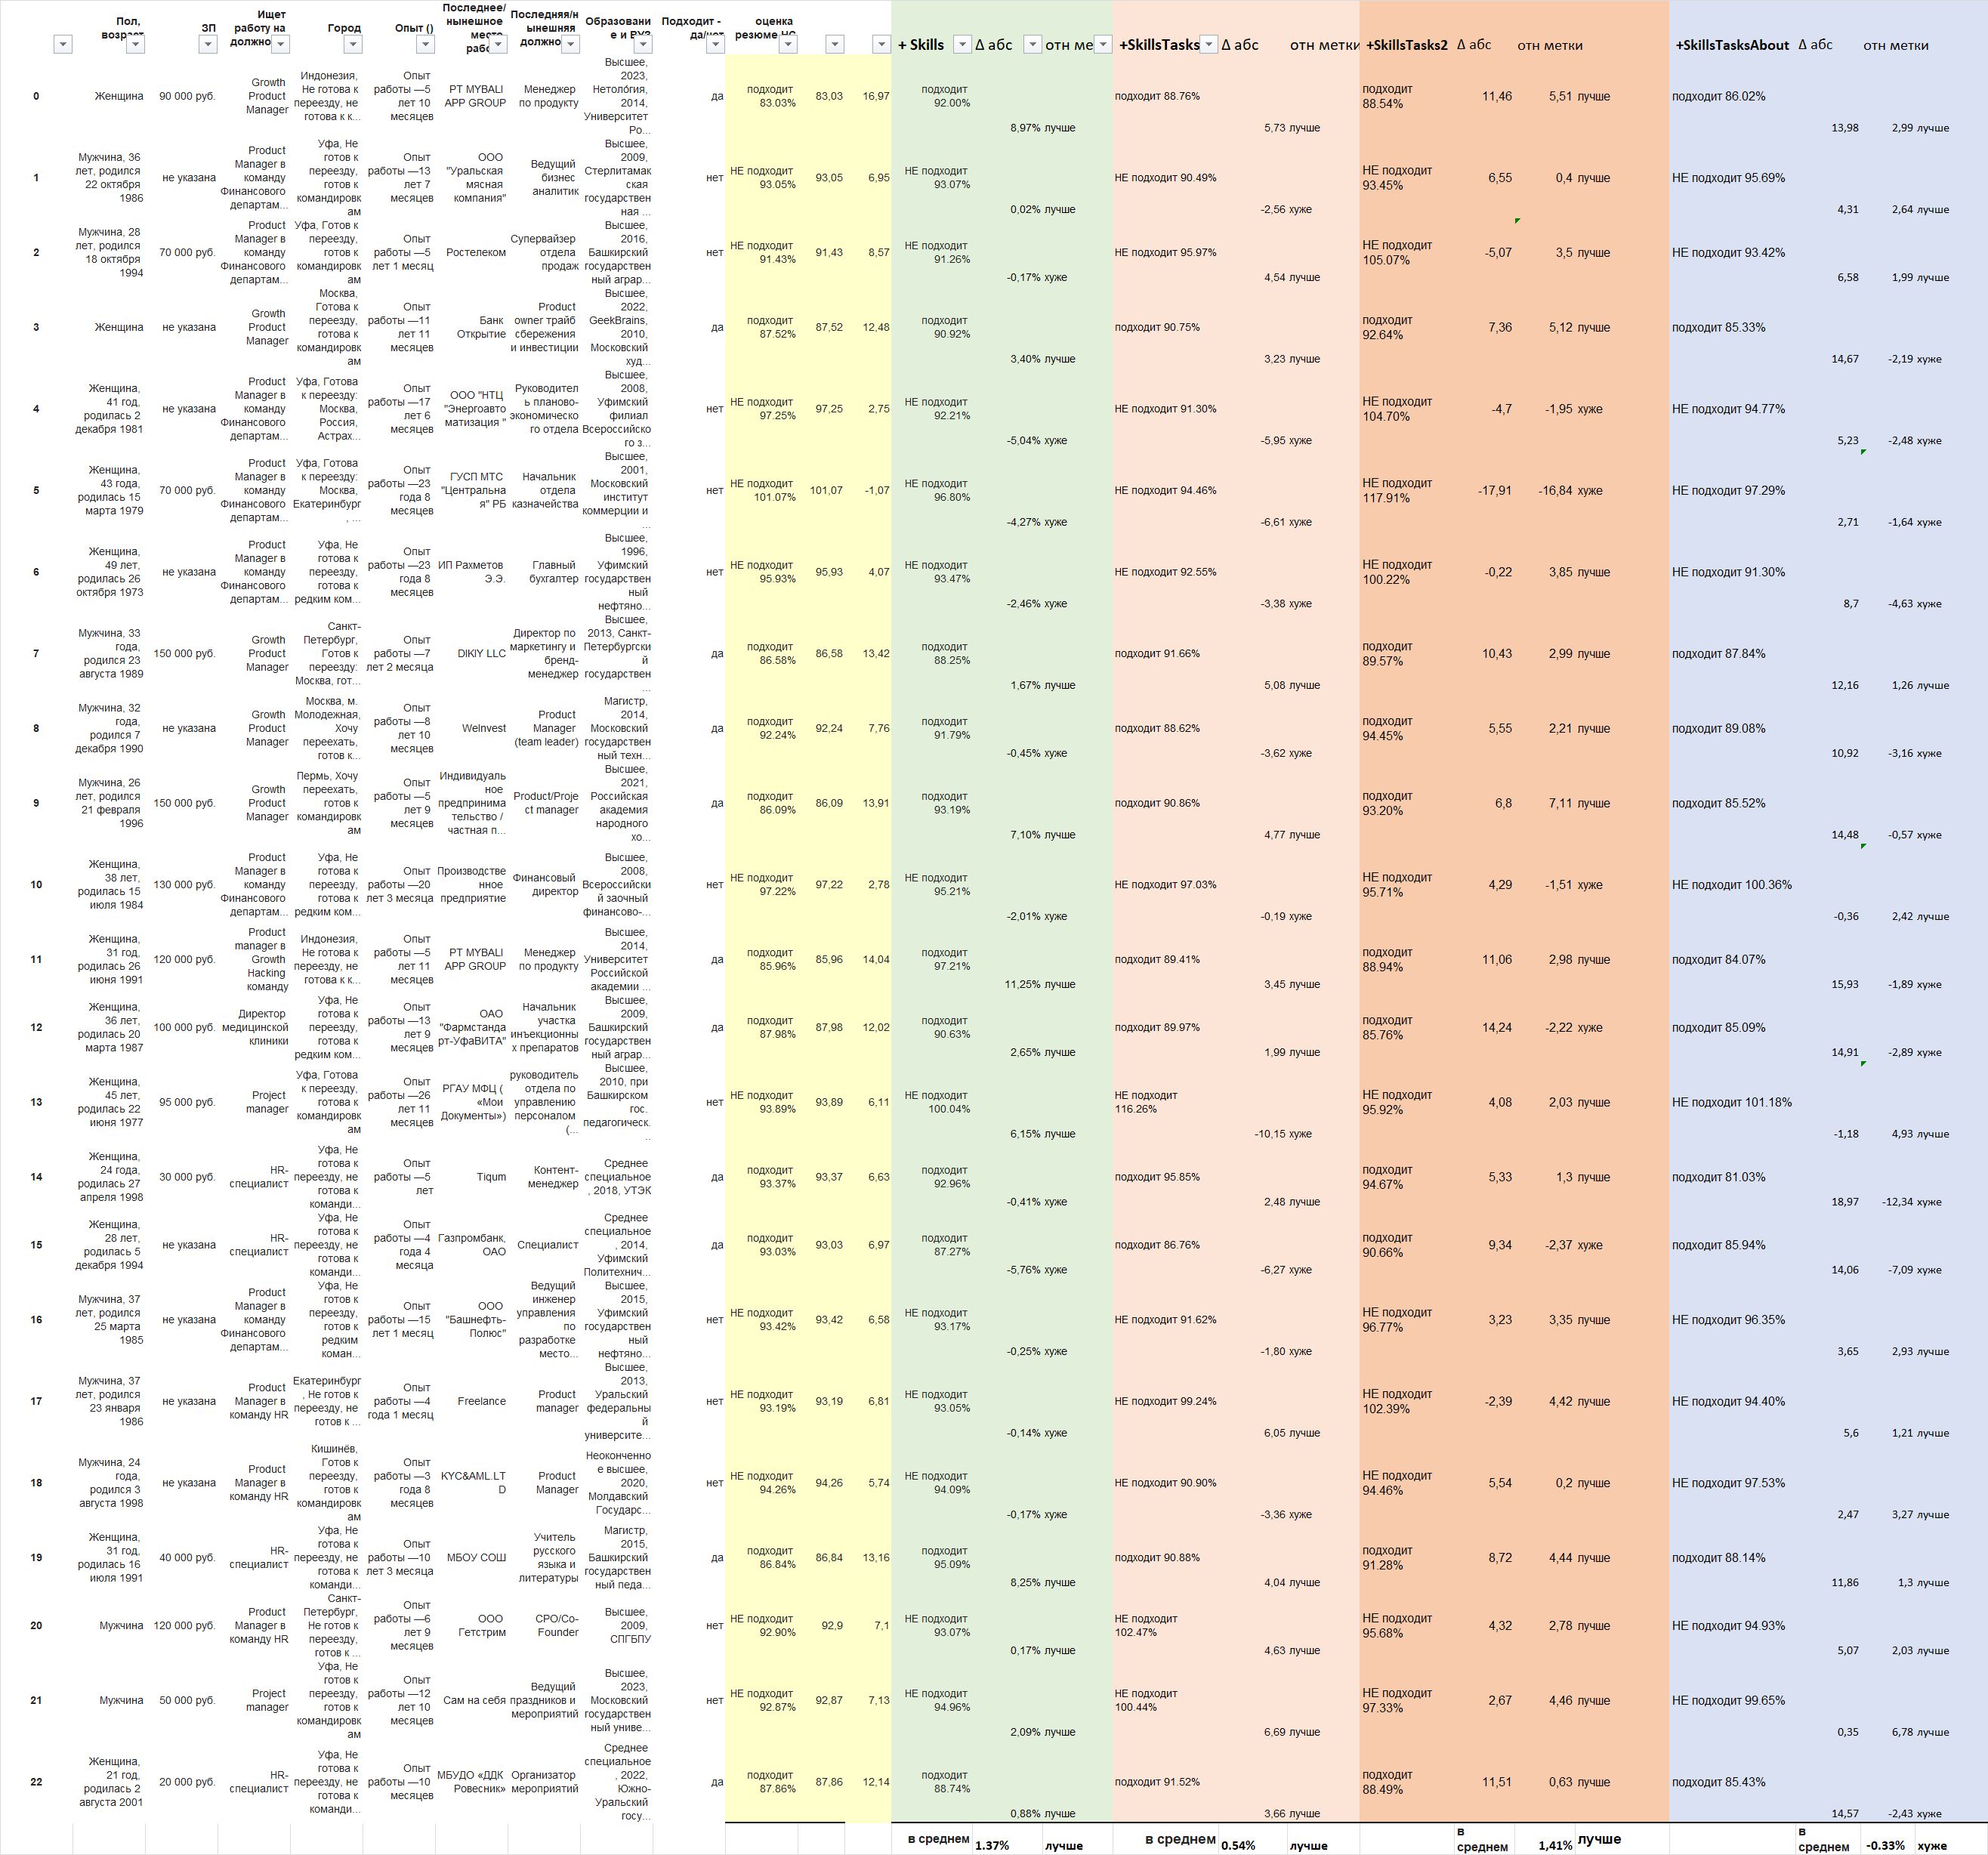

## Результаты проведенных работ и экспериментов


**Резюме. Выводы. Планы.**

1. До получения расширенного датасета от Заказчика, постороенная составная неросеть из трех веток обучается нормально и дает затребованную точность предсказаний на проверочной выборке выше 95%:
 - одна ветка обрабатывает простые категоризированные данные о соискателе;
 - одна ветка обрабатывает текстовые данные о последнем месте работы и должности соискателя;
 - одна ветка обрабатывает текстовые данные об образовании соискателя и законченном учебном заведении.

Предсказания обученной НС по "тестовой выборке" (составленной только из данных с метками Заказчика, но участвовавших в обучении НС), совпадают с категорией меток (да, подходит/нет, не подходит). Как и хотел Заказчик, предсказания имеют некое процентное выражение, соответствующее вероятности отнесения к классам “подходит” и “не подходит”. Результат предсказания записывается в дополнительное поле предоставленного Датасета и обогащенный датасет экспортируется в файл .CSV
(Результаты  в ноутбуке 6).

2. Использование дополнительной 4 ветки НС с обработкой текстовых данных о навыках соискателя из дополненного Дататсета изменило оценку обученной модели, но как оценить изменения - не понятно.

С позиции приближения результата оценки к крайним точкам принятых значений меток "да"/ "нет", результат (в среднем) стал лучше на 1,37%.  
НО данная метрика не кажется правильной т.к. в оценке заказчика да/нет отсутствует степень соответствия этим значениям, а считать их за 100%  - вряд ли правильно. Однако, к-либо другой точки отчета у нас нет.
(Результат в нутбуке 7)

3. Использование в добавленной 4 ветке обработки данных сразу двух новых полей "навыки" и "задачи" (тексты объеденены) снова изменило оценку обученной модели на тех же "тестовых данных".
Если использовать ту же логику сравнения, то результат стал хуже предыдущего, но все же лучше изначального (до дополненного ДС). Улучшение снизилось до 0.54% (в среднем). т.е. разброс предсказаний относительно меток заказчика "да" и "нет" принятых за 100% стал больше. Тем не менее, все предсказания соответствуют категориям да/нет разметки Заказчика.
(Результат в ноутбуке 8)

4. Вероятной причиной ухудшения предсказания является большая замусоренность поля "задачи". Если улучшить предобработку данного поля разными вариантами структуризации данных, результат, наверняка, возможно улучшить.

Другой стратегией может быть выделение обработки данных этого поля в отдельную 5 ветку составной нейросети. При этом возможно применить несколько отличную модель обработки текстовых данных (подобрать по результатам экспериментов).

5. В ноутбуке 9 была выполнена дополнительная предобработка текстовых полей "навыки" совместно с "задачи":
 - в обоих полях пустые значения заменены на слово "неизвестно";
 - значения полей объеденены в единый текст: к навыкам добавлена инфа по задачам;
 - очистка текста от интернет-ссылок, знаков, символов, майликов, нумерации разного вида, разделителей;
 - токинезация, лемматизация и удаление стоп-слов.
 Объединенный текст составил отдельную выборку, с которой обучалась отдельная ветка в составе составной.
 результат предсказаний на том же "тестовом" наборе данных ожидаемо показал результат не только лучше предыдущего, и лучше варианта отдельной обработки навыков.

6. В данном ноутбуке (9_)применен вариант совместной обработки всех трех текстовых полей дополненного ДС одной нейронкой. Предобработка текста аналогична предыдущей. Результат предсказания обученной Нейросетки показал незначительное ухудшение относительно варианта без обработки текста.
Вывод: текст поля "О себе" нельзя совмещать с навыками и задачами в силу совершенно различной смысловой нагрузки.  Можно попытаться обработать его отдельной веткой составной неросети, как и видилось ранее.

7. Резюме с неразмеченными Заказчиком данными можно оценить обученной НС ноутбука 9 и отдать Заказчику для промежуточной оценки промежуточной оценки: "холодно/горячо". Дополнительная обработка поля "о себе" вряд ли значительно изменит результаты работы нейронки.